In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from datetime import timedelta
import matplotlib.lines as mlines

Figure 2 in the manuscript - Sample time-series of NEP for four selected sites and their probability density functions 


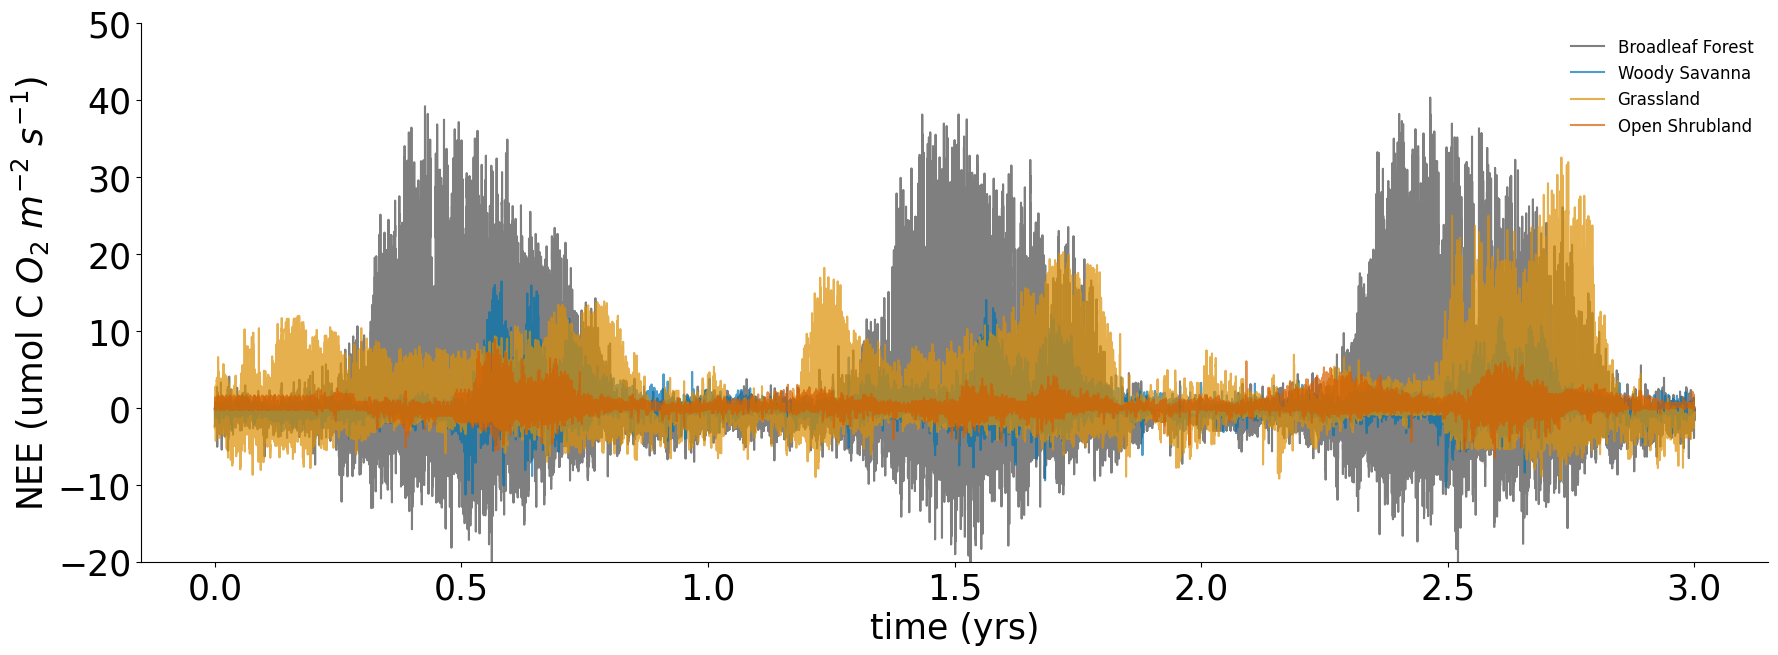

In [3]:

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import seaborn as sns

# Loading data
df = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/USSRM1113.xlsx")
df1 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/AURIGGRA_1113.xlsx")
df2 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/DKSOR0911_DBF.xlsx")
df3 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/USSRCOSH_0810.xlsx")

# Extracting NEE
x = df['NEE_OPPSIGN']
x1 = df1['NEE_OPPSIGN']
x2 = df2['NEE_OPPSIGN']
x3 = df3['NEE_OPPSIGN']

# Creating a colorblind-friendly palette
palette = sns.color_palette("colorblind", 4)

# plotting
fig, ax = plt.subplots(figsize=(21, 7))

time5 = [0, 0.5, 1, 1.5, 2, 2.5, 3]
ax.plot(np.linspace(0, 3, len(x2)), x2, color='#000000', alpha=0.5, label='Broadleaf Forest')
ax.plot(np.linspace(0, 3, len(x)), x, color=palette[0], alpha=0.7, label='Woody Savanna')
ax.plot(np.linspace(0, 3, len(x1)), x1, color=palette[1], alpha=0.7, label='Grassland')
ax.plot(np.linspace(0, 3, len(x3)), x3, color=palette[3], alpha=0.7, label='Open Shrubland')
ax.set_xlabel("time (yrs)", size='25')
ax.set_ylabel('NEE (umol C $O_{2}$ $m^{-2}$ $s^{-1}$)', fontsize=25)
ax.legend(loc='best', prop={'size': 14})
ax.tick_params(axis='both', labelsize=25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-20, 50)
ax.legend(loc='best', fontsize=12, frameon=False)
plt.show()



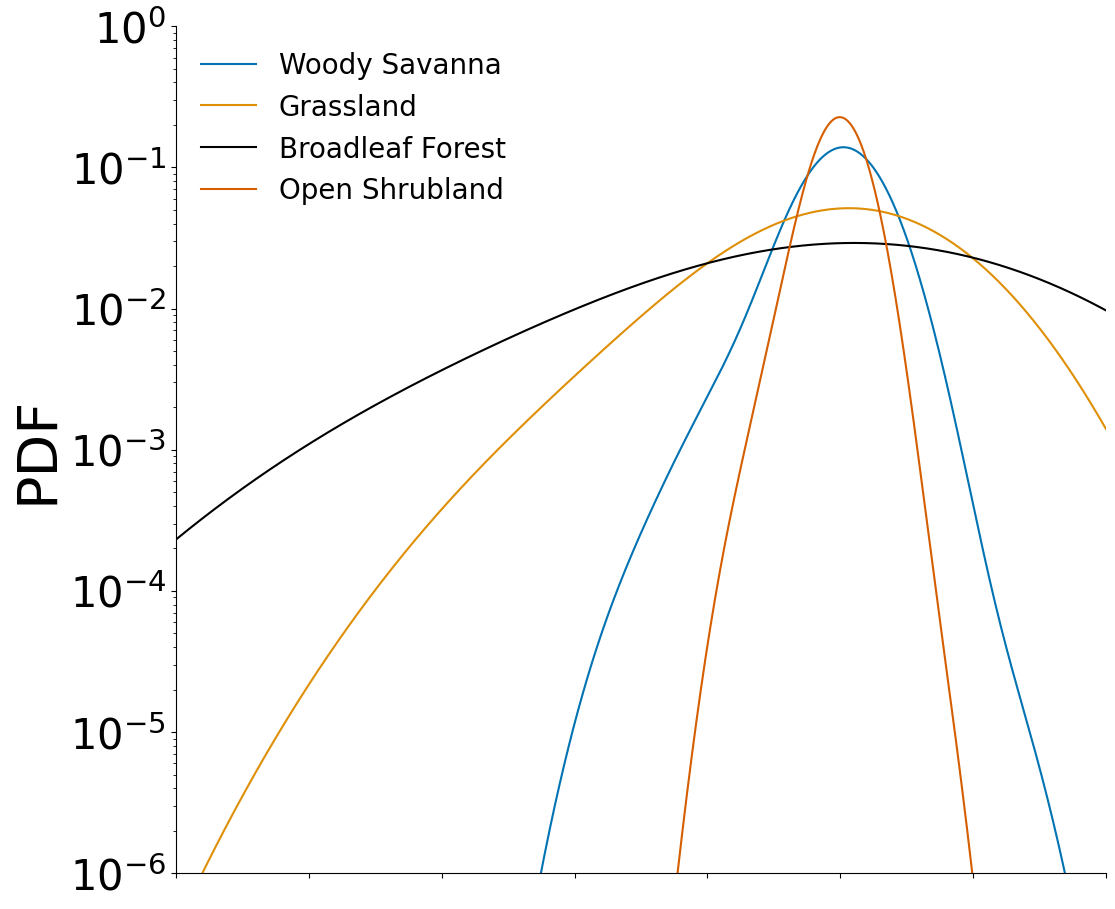

In [4]:
# plotting for corresponding PDFs

# importing necessary libraries
from scipy.stats import gaussian_kde

# extracting NEE
data1 = df['NEE_OPPSIGN']
data2 = df1['NEE_OPPSIGN']
data3 = df2['NEE_OPPSIGN']
data4 = df3['NEE_OPPSIGN']

# Creating Gaussian Kernel Density Estimates
kde1 = gaussian_kde(data1, bw_method=1.5)
kde2 = gaussian_kde(data2, bw_method=1.5)
kde3 = gaussian_kde(data3, bw_method=1.5)
kde4 = gaussian_kde(data4, bw_method=1.5)

# Defining the range for the histograms
x_range = np.linspace(50, -20, 1000)  # reversing the range
kde_values1 = kde1.evaluate(x_range)
kde_values2 = kde2.evaluate(x_range)
kde_values3 = kde3.evaluate(x_range)
kde_values4 = kde4.evaluate(x_range)

plt.figure(figsize=(12, 11))
plt.plot(x_range, kde_values1, label='Woody Savanna',color=palette[0] )
plt.plot(x_range, kde_values2, label='Grassland', color=palette[1])
plt.plot(x_range, kde_values3, label='Broadleaf Forest', color='#000000')
plt.plot(x_range, kde_values4, label='Open Shrubland', color=palette[3])

# Setting the y-axis to log scale and defining its limits
plt.yscale('log')
plt.ylim(1e-6, 1)

plt.ylabel('PDF', fontsize=40)
plt.legend(prop={'size': 20}, frameon=False)
plt.tick_params(axis='both', labelsize=30)
plt.xlim([50, -20])  # Reversed x-axis range
ax = plt.gca()  # Get current axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels([])
plt.show()


In [5]:
# reading the necessary excel file
df = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/AUGIN_WSA.xlsx")

In [6]:
# reading the necessary columns
x = df['NEE_OPPSIGN']
time = df['Timestamp']
gpp = df['GPP_NT_VUT_REF']
reco = df['RECO_NT_VUT_REF']
ta = df['TA']
gppd = df['GPP_DT_VUT_REF']
recod = df['RECO_DT_VUT_REF']
sw = df['SW']

In [7]:
# defining statistics for threshold
def basic_stats(x, cnt):
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_stdev_cnt = x_stdev * cnt
    upthr = x_mean + x_stdev_cnt
    res = {"upthr": upthr}  
    return res

In [8]:
# Getting peaks above the threshold
def get_filtered_peaks_and_other(a, thresholds):
    listup = []
    listup1 = []
    timeup1 = []
    listupindices = []
    listup1indices = []
    templistup = []
    timeup = []
    templistupindices = []

    for i in range(1, len(a)-1):
        if a[i] >= thresholds['upthr'] and a[i] != a[i+1] and a[i-1] < a[i] and a[i+1] < a[i]:
            listup.append(a[i])
            listupindices.append(a[i])
        elif a[i] >= thresholds['upthr'] and a[i] == a[i+1] and a[i-1] < a[i] and a[i+2] < a[i]:
            listup1.append(a[i])
            timeup1.append(time[i])
            listup1indices.append(a[i])
    
    for i in range(1, len(a)-1):
        if a[i] >= thresholds['upthr'] and a[i-1] < a[i] and a[i+1] < a[i]:
            templistup.append(a[i]) 
            timeup.append(time[i])
            templistupindices.append(i)

    upvalues_list = listup + listup1
    up_time = timeup + timeup1
    filtered_peaks = list(zip(up_time, upvalues_list))
    return templistup, timeup, templistupindices, listupindices, listup1indices, filtered_peaks


In [9]:
def pick_points(a, thresholds):
    all_points_above = []
    for i in range(len(a)):
        if a[i] >= thresholds['upthr']:
            all_points_above.append(a[i])
    return all_points_above

In [10]:
# Selecting peaks based on tau of +/-6
def tau_points(filtered_peaks):
    selected_peaks = []
    if len(filtered_peaks) == 0:
        pass

    start = 0
    maximum_peak = filtered_peaks[0][1]
    selected_peak_index = 0
    interval = timedelta(hours=6)

    for j in range(1, len(filtered_peaks)):
        if j >= len(filtered_peaks):
            break
        
        if filtered_peaks[j][0] - filtered_peaks[start][0] >= interval:
            selected_peaks.append(selected_peak_index)
            maximum_peak = -1
            while j < len(filtered_peaks) and filtered_peaks[j][0] - filtered_peaks[selected_peak_index][0] < interval:
                j = j + 1
            if j >= len(filtered_peaks):
                break
            start = j
            maximum_peak = -1

        if filtered_peaks[j][1] > maximum_peak:
            maximum_peak = filtered_peaks[j][1]
            selected_peak_index = j

    if maximum_peak != -1:
        selected_peaks.append(selected_peak_index)

    golden_peaks = []

    for i in selected_peaks:
        golden_peaks.append(filtered_peaks[i])

    golden_peaks_df = pd.DataFrame(golden_peaks, columns=['Timestamp', 'golden_peaks'])
    golden_peaks_df.head()
    gp = golden_peaks_df.sort_values(by="Timestamp")
    gp = gp.reset_index(drop=True)
    return gp

In [11]:
# Getting fluctuation paths 
def fluctuation_paths(golden_peaks_df, columns, data_frame, output_name):
    gp = golden_peaks_df
    golden_peaks_tstat = pd.DataFrame(gp, columns=['Timestamp'])
    gp["Timestamp"] = pd.to_datetime(gp["Timestamp"])
    freq = 'H'
    date = gp["Timestamp"] + pd.Timedelta(6, unit=freq)
    dateminus = gp["Timestamp"] + pd.Timedelta(-6, unit=freq)
    lower_bound = list(dateminus)
    upper_bound = list(date)
    bounds = dict()

    for i in range(0, len(lower_bound)):
        date_lower = lower_bound[i]
        date_upper = upper_bound[i]
        df_copy = data_frame.copy()
        df_copy = df_copy[df_copy['Timestamp'] >= date_lower]
        df_copy = df_copy[df_copy['Timestamp'] <= date_upper]
        bounds[i] = df_copy

        df0 = df_copy.copy()
        df0 = df0.reset_index(drop=True)
        df0 = df0.drop(columns=['Timestamp','TA', 'SW','GPP_DT_VUT_REF','RECO_DT_VUT_REF','RECO_NT_VUT_REF','GPP_NT_VUT_REF','SWC_F_MDS_1'], axis=1)
        df0.columns = [output_name + str(i+1)]
        if i == 0:
            df_all = df0.copy()
        else:
            df_all = df_all.join(df0)
    return df_all


In [12]:
# normalizing FPs
def divide_cells(df_all):
    cell_values = df_all.iloc[12, :].values.tolist()
    divided_df_all = df_all.div(cell_values)
    divided_df_all_avg = divided_df_all.mean(axis=1)
    
    return divided_df_all, divided_df_all_avg


In [13]:
# Getting fluctuation paths for specific threshold
coeff = [2.23]
fp_values = []  
fp_avg_values = []  

for c in coeff:
    thresholds = basic_stats(x, c)
    templistup, timeup, templistupindices, listupindices, listup1indices, filtered_peaks = get_filtered_peaks_and_other(x, thresholds)
    allpointsaboveUL = pick_points(x, thresholds)
    neegp = tau_points(filtered_peaks)
    columns = ['Timestamp', 'TA', 'SW', 'GPP_DT_VUT_REF', 'RECO_DT_VUT_REF','RECO_NT_VUT_REF','GPP_NT_VUT_REF','SWC_F_MDS_1']
    output_name = 'NEE'
    df_allNEE = fluctuation_paths(neegp, columns, df, output_name)
    divided_df_all, divided_df_all_avg = divide_cells(df_allNEE)
    fp_values.append(divided_df_all)
    fp_avg_values.append(divided_df_all_avg)

/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  date = gp["Timestamp"] + pd.Timedelta(6, unit=freq)
/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  dateminus = gp["Timestamp"] + pd.Timedelta(-6, unit=freq)


Figures S2 and S3 in the Supplementary information - Fluctuation paths (light gray) and their average (thick dark gray) for top 1% fluctuations and all fluctuations (replace above coeff = 0)


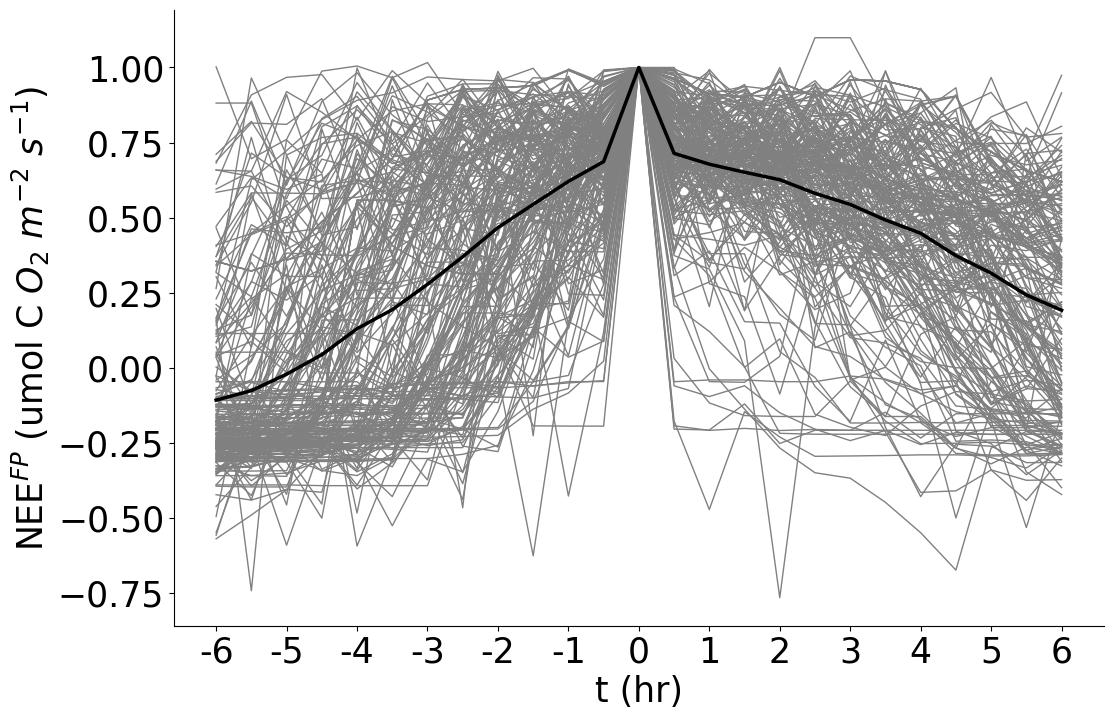

In [14]:
# Plotting FPs and AVG_FP
fig, ax = plt.subplots(figsize=(12, 8))

x_tick_labels = (-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)
cl = divided_df_all.columns

for i in range(len(cl)):
    ax.plot(x_tick_labels, divided_df_all[cl[i]], label=cl[i], color='grey', lw=1)

ax.plot(x_tick_labels, divided_df_all_avg, lw=2.5, color='k', label="avg")

ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x_tick_labels)
xticks = ax.xaxis.get_major_ticks()
hidden_indices = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

for index in hidden_indices:
    xticks[index].label1.set_visible(False)
    xticks[index].tick1line.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("t (hr)", size='25')
plt.ylabel('NEE$^{FP}$ (umol C $O_{2}$ $m^{-2}$ $s^{-1}$)', fontsize=25)
plt.show()


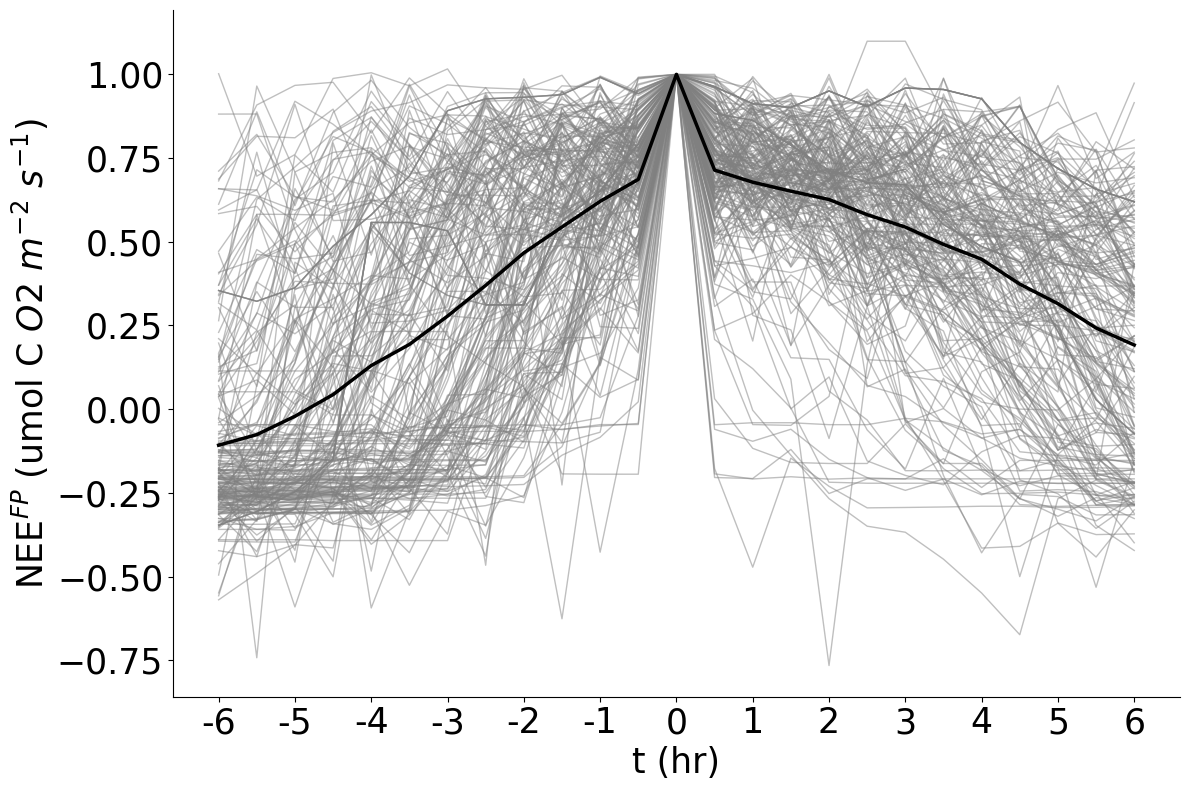

In [15]:
# To handle outliers for specfic sites (US-SRM, US-SRG and ES-LJu)

# Defining function to handle outliers
def handle_outliers(df, n_std=5):
    mean = df.values.mean()
    std = df.values.std()
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std
    return df.clip(lower=lower_bound, upper=upper_bound)

handled_df_all = handle_outliers(divided_df_all)
handled_df_all_avg = handled_df_all.mean(axis=1)

# Plotting FPs and FP_AVG after handling outliers

fig, ax = plt.subplots(figsize=(12, 8))
x_tick_labels = (-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)
cl = handled_df_all.columns

for i in range(len(cl)):
    ax.plot(x_tick_labels, handled_df_all[cl[i]], color='grey', lw=1, alpha=0.5)

ax.plot(x_tick_labels, handled_df_all_avg, lw=2.5, color='k', label="Average")

ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x_tick_labels)
xticks = ax.xaxis.get_major_ticks()
hidden_indices = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

for index in hidden_indices:
    xticks[index].label1.set_visible(False)
    xticks[index].tick1line.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  # Corrected line
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("t (hr)", size='25')
plt.ylabel('NEE$^{FP}$ (umol C $O{2}$ $m^{-2}$ $s^{-1}$)', fontsize=25)
# plt.title("NEE Fluctuation Paths (Outliers Handled)", fontsize=25)
# plt.legend(fontsize=20)
plt.tight_layout()
plt.show()



In [16]:
# splitting df_all into towards and away
def get_ac_coeffs(divided_df_all, gp):
    divided_df_all = pd.DataFrame(divided_df_all)
    up_dfall = divided_df_all.iloc[0:13]
    low_dfall = divided_df_all.iloc[12:25]
    up1_dfall = up_dfall.reindex(index=up_dfall.index[::-1])
    idx2 = up1_dfall.reset_index()
    idx1 = low_dfall.reset_index()
    diff_df = idx1.sub(idx2)
    ac = diff_df.drop(columns=['index'])
    ac_avg = ac.mean(axis=1)
    return ac, ac_avg


In [17]:
# getting asymmetry coefficient for specific threshold
coeff = [2.23]
ac_values = [] 
ac_avg_values = []  

for c in coeff:
    thresholds = basic_stats(x, c)
    templistup, timeup, templistupindices, listupindices, listup1indices, filtered_peaks = get_filtered_peaks_and_other(x, thresholds)
    allpointsaboveUL = pick_points(x, thresholds)
    neegp = tau_points(filtered_peaks)
    columns = ['Timestamp', 'TA', 'SW', 'GPP_DT_VUT_REF', 'RECO_DT_VUT_REF', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF', 'SWC_F_MDS_1']
    output_name = 'NEE'
    df_allNEE = fluctuation_paths(neegp, columns, df, output_name)
    divided_df_all, divided_df_all_avg = divide_cells(df_allNEE)
    ac, ac_avg = get_ac_coeffs(divided_df_all, neegp)
    ac_values.append(ac)
    ac_avg_values.append(ac_avg)

/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  date = gp["Timestamp"] + pd.Timedelta(6, unit=freq)
/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  dateminus = gp["Timestamp"] + pd.Timedelta(-6, unit=freq)


Figures S4 and S5 in the Supplementary information - Asymmetry Coefficients (light gray) and their average (thick dark gray) for top 1% fluctuations and all fluctuations (replace above coeff = 0)


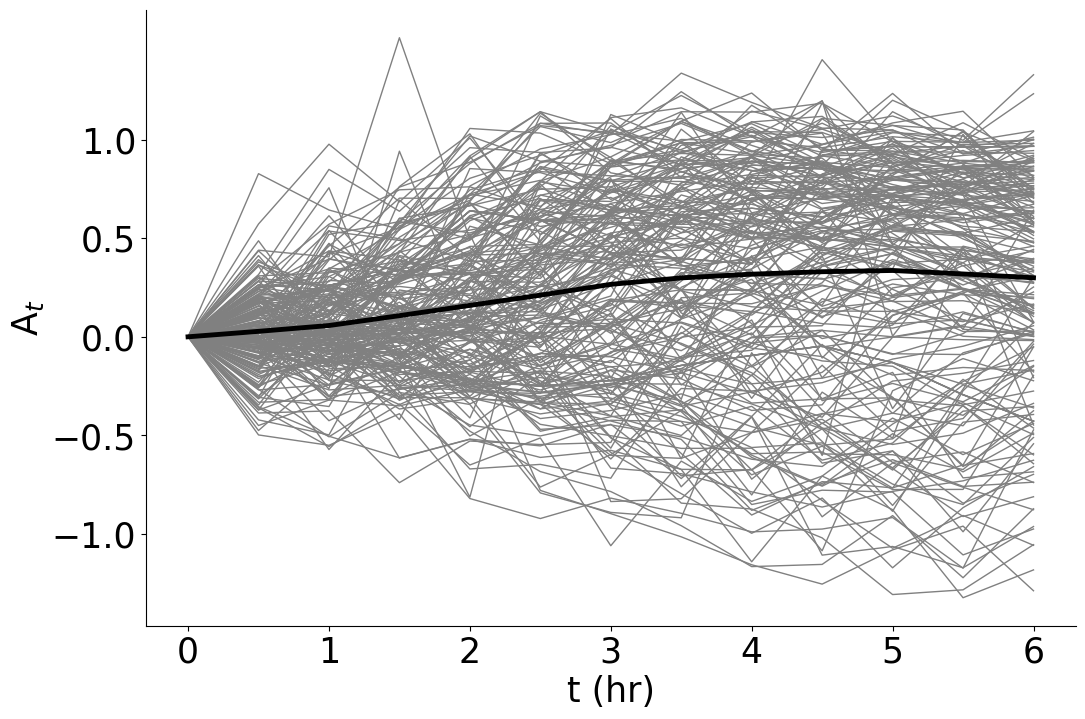

In [18]:
# Plotting Asymmetry and AC_AVG

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
cl = ac.columns
for i in range(len(cl)):
    ax.plot(ac[cl[i]], label=cl[i], lw=1, color='grey')

# Plotting the average
ax.plot(ac_avg, lw=3.5, color='black', label="avg")

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("t (hr)", size='25')
plt.ylabel('A$_{t}$', fontsize=25)
x_tick_labels = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)
ax.set_xticks(range(len(x_tick_labels)))
ax.set_xticklabels(x_tick_labels)
xticks = ax.xaxis.get_major_ticks()
hidden_indices = [1, 3, 5, 7, 9, 11]

for index in hidden_indices:
    if index < len(xticks):
        xticks[index].label1.set_visible(False)
        xticks[index].tick1line.set_visible(False)
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


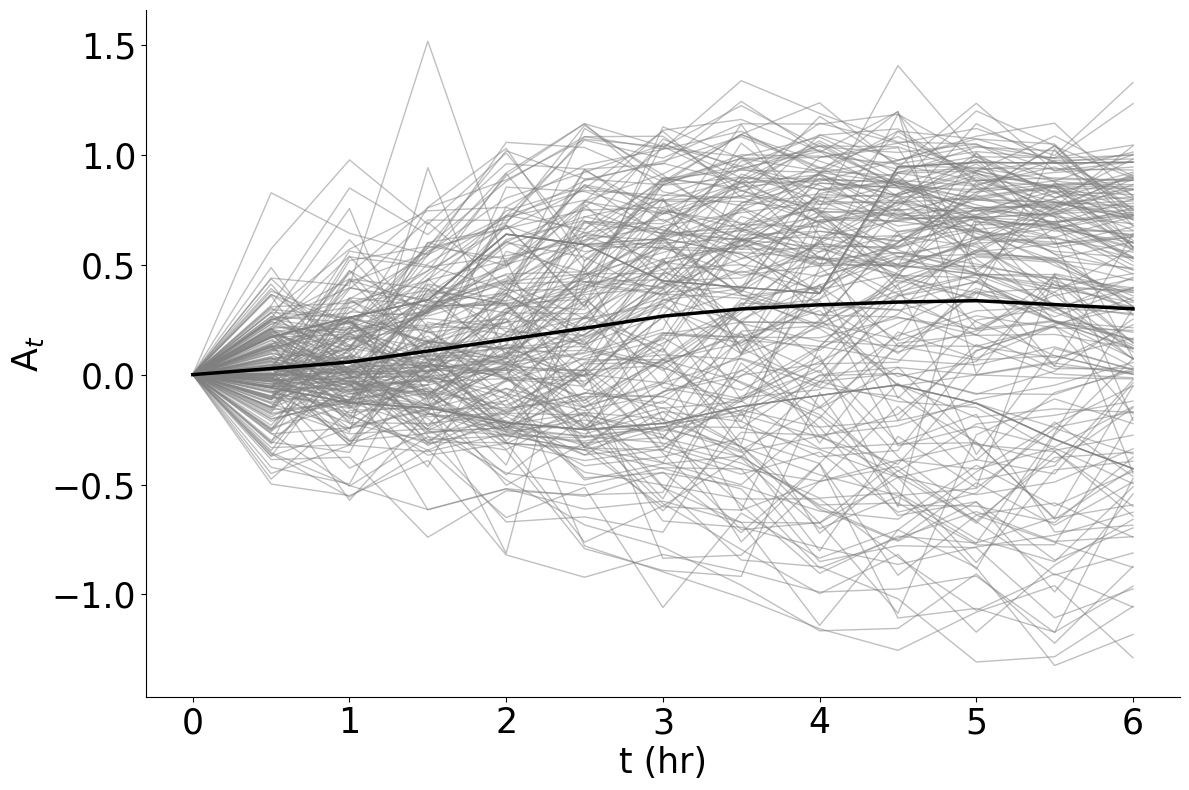

In [19]:
# To handle outliers for specfic sites (US-SRM, US-SRG and ES-LJu)

# Defining function to handle outliers
def handle_outliers(df, n_std=5):
    mean = df.values.mean()
    std = df.values.std()
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std
    return df.clip(lower=lower_bound, upper=upper_bound)


handled_ac = handle_outliers(ac)
handled_ac_avg = handled_ac.mean(axis=1)

# Plotting Asymmetry and AC_AVG after handling outliers
fig, ax = plt.subplots(figsize=(12, 8))

x_tick_labels = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)
cl = handled_ac.columns

for i in range(len(cl)):
    ax.plot(x_tick_labels, handled_ac[cl[i]], color='grey', lw=1, alpha=0.5)

ax.plot(x_tick_labels, handled_ac_avg, lw=2.5, color='k', label="Average")

ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x_tick_labels)
xticks = ax.xaxis.get_major_ticks()
hidden_indices = [1, 3, 5, 7, 9, 11]

for index in hidden_indices:
    if index < len(xticks):
        xticks[index].label1.set_visible(False)
        xticks[index].tick1line.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("t (hr)", size='25')
plt.ylabel('A$_{t}$', fontsize=25)
plt.tight_layout()
plt.show()



In [20]:
# Storing FP average values
fp_avg_df = pd.DataFrame(divided_df_all_avg)
# top 1% fluctuations
divided_df_all_avg.to_excel("/Users/nikhi/Desktop/fluxnet sites/C99THR/AUGIN99FPAVG.xlsx", index=False)
# all fluctuations
divided_df_all_avg.to_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/AUGINFPAVG.xlsx", index=False)


In [21]:
# Storing asymmetry average values
ac_avg_df = pd.DataFrame(ac_avg)
# top 1% fluctuations
ac_avg_df.to_excel("/Users/nikhi/Desktop/fluxnet sites/C99THR/AUGIN99ACAVG.xlsx", index=False)
# all fluctuations
ac_avg_df.to_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/AUGINACAVG.xlsx", index=False)


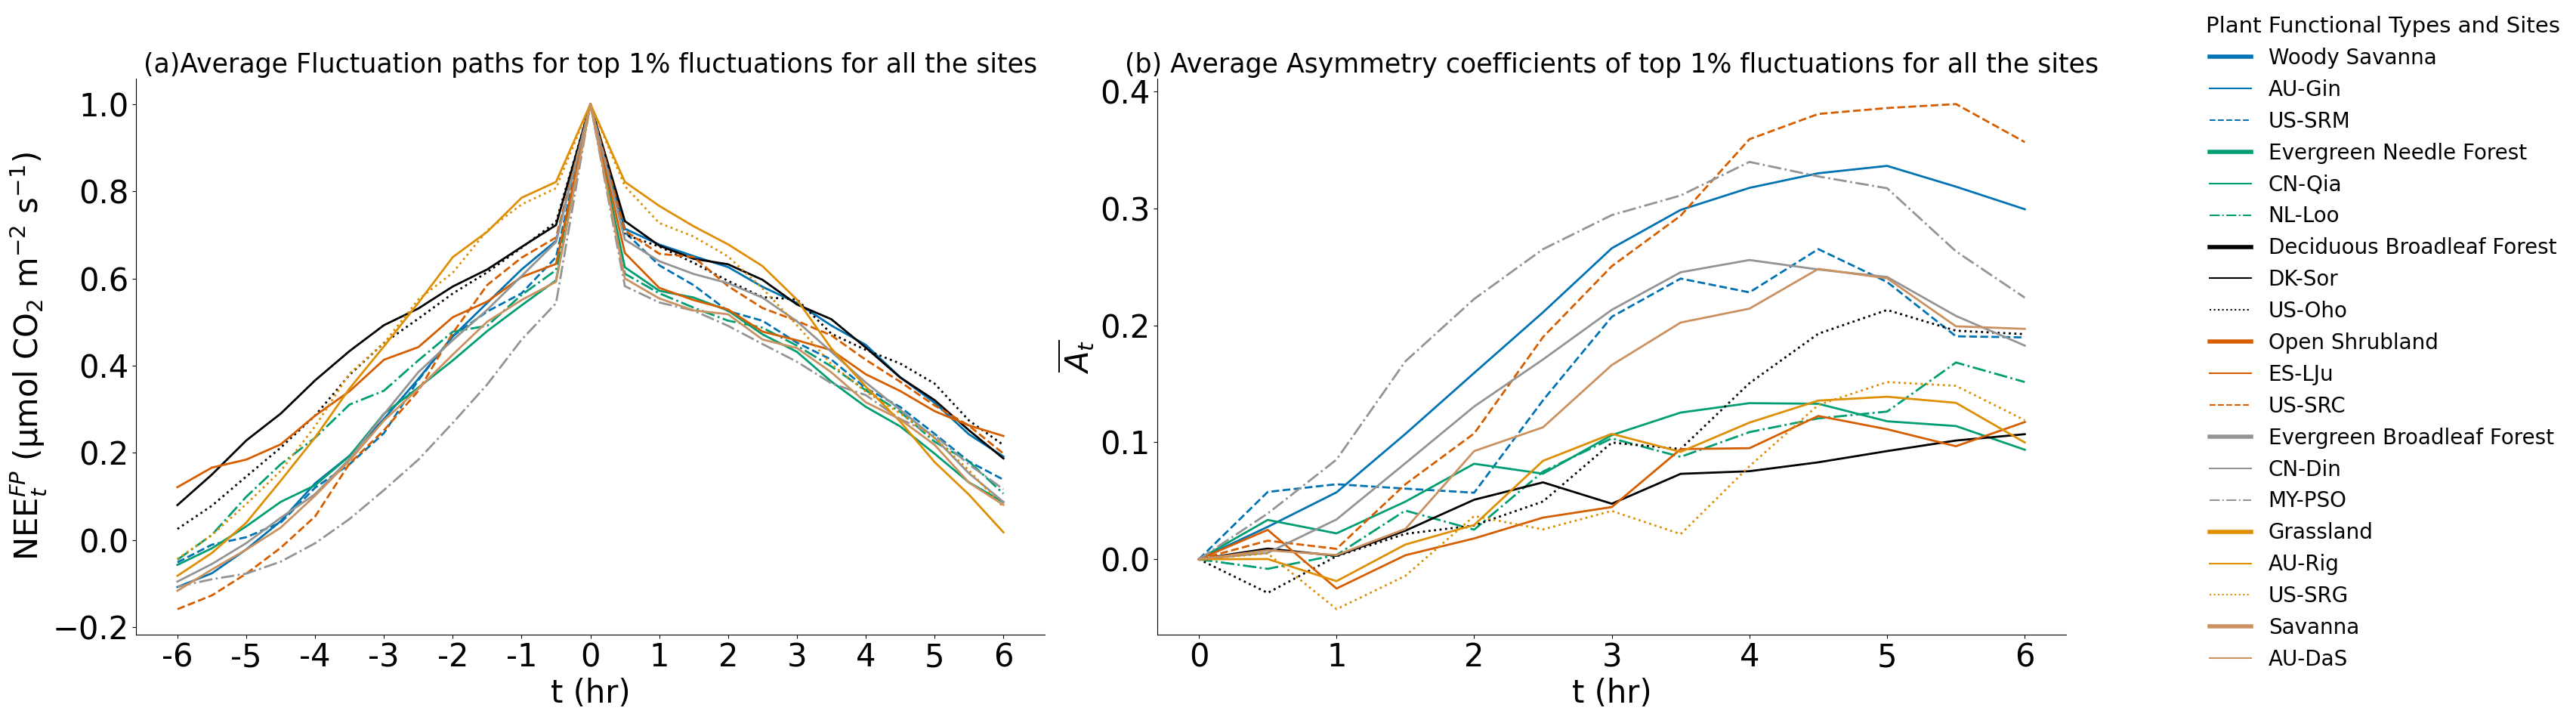

In [22]:
# plotting average fluctuation paths and average asymmetry coefficient for top 1% fluctuations for all sites

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from datetime import timedelta
import matplotlib.lines as mlines
import seaborn as sns

# reading data and defining site labels
data1 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/NEEMEANTHRFPAVG.xlsx")
data2 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/NEEMEANTHRACAVG.xlsx")

ws1 = data1['AUGIN']
enf1 = data1['CNQIA']
dbf1 = data1['DKSOR']
osh1 = data1['ESLJU']
ebf1 = data1['CNDIN']
enf2 = data1['NLLOO']
osh2 = data1['USSRC']
gra1 = data1['AURIG']
gra2 = data1['USSRG']
sav = data1['AUDAS']
dbf2 = data1['USOHO']
ebf2 = data1['MYPSO']
ws2 = data1['USSRM']

# plotting 


# Creating colorblind-friendly palette and defining color for each PFT
palette = sns.color_palette("colorblind", 8)


spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'   
}

pft_colors = {
    'Woody Savanna': spec_colors['USSRM'],  
    'Evergreen Needle Forest': palette[2],  
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'],  
    'Open Shrubland': spec_colors['USSRC'],  
    'Evergreen Broadleaf Forest': palette[7], 
    'Grassland': spec_colors['AURIG'], 
    'Savanna': palette[5]  
}

pft_ls = {
    'Woody Savanna': ['-', '--'],
    'Evergreen Needle Forest': ['-', '-.'],
    'Deciduous Broadleaf Forest': ['-', ':'],
    'Open Shrubland': ['-', '--'],
    'Evergreen Broadleaf Forest': ['-', '-.'],
    'Grassland': ['-', ':'],
    'Savanna': ['-']
}

site_labels = {
    'AUGIN': ('Woody Savanna', 'AU-Gin', ws1),
    'USSRM': ('Woody Savanna', 'US-SRM', ws2),
    'CNQIA': ('Evergreen Needle Forest', 'CN-Qia', enf1),
    'NLLOO': ('Evergreen Needle Forest', 'NL-Loo', enf2),
    'DKSOR': ('Deciduous Broadleaf Forest', 'DK-Sor', dbf1),
    'USOHO': ('Deciduous Broadleaf Forest', 'US-Oho', dbf2),
    'ESLJU': ('Open Shrubland', 'ES-LJu', osh1),
    'USSRC': ('Open Shrubland', 'US-SRC', osh2),
    'CNDIN': ('Evergreen Broadleaf Forest', 'CN-Din', ebf1),
    'MYPSO': ('Evergreen Broadleaf Forest', 'MY-PSO', ebf2),
    'AURIG': ('Grassland', 'AU-Rig', gra1),
    'USSRG': ('Grassland', 'US-SRG', gra2),
    'AUDAS': ('Savanna', 'AU-DaS', sav),
}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(29, 10))

data1 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/C99THR/C99THRFPAVG.xlsx")
data2 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/C99THR/C99THRACAVG.xlsx")


pft_cnt = {pft: 0 for pft in pft_colors.keys()}

x_tick_labels1 = (-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)

x_tick_labels2 = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)

for site_val, (pft, site_name, data) in site_labels.items():
    color = pft_colors[pft]
    linestyle = pft_ls[pft][pft_cnt[pft] % len(pft_ls[pft])]
    pft_cnt[pft] += 1

    # Plotting for NEE^FP
    if site_val in data1.columns:
        ax1.plot(x_tick_labels1, data1[site_val], lw=2, color=color, linestyle=linestyle, label=f"{pft} - {site_name}")
    
    # Plotting for A_t
    if site_val in data2.columns:
        ax2.plot(range(len(x_tick_labels2)), data2[site_val], lw=2, color=color, linestyle=linestyle, label=f"{pft} - {site_name}")    

ax1.set_xticks(x_tick_labels1)
ax1.set_xticklabels(x_tick_labels1)
xticks1 = ax1.xaxis.get_major_ticks()
hidden_indices1 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
for index in hidden_indices1:
    if index < len(xticks1):
        xticks1[index].label1.set_visible(False)
        xticks1[index].tick1line.set_visible(False)
ax1.set_xlabel("t (hr)", size='30')
ax1.set_ylabel('NEE$^{FP}_{t}$ (μmol CO$_2$ m$^{-2}$ s$^{-1}$)', size=30)
ax1.tick_params(axis='both', labelsize=30)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('(a)Average Fluctuation paths for top 1% fluctuations for all the sites', fontsize=25)

ax2.set_xticks(range(len(x_tick_labels2)))
ax2.set_xticklabels(x_tick_labels2)
xticks2 = ax2.xaxis.get_major_ticks()
hidden_indices2 = [1, 3, 5, 7, 9, 11]
for index in hidden_indices2:
    if index < len(xticks2):
        xticks2[index].label1.set_visible(False)
        xticks2[index].tick1line.set_visible(False)
ax2.set_xlabel("t (hr)", size='30')
ax2.set_ylabel('$\overline{A_{t}}$', size='30')
ax2.tick_params(axis='both', labelsize=30)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('(b) Average Asymmetry coefficients of top 1% fluctuations for all the sites', fontsize=25)


handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pft_groups = {}
for site_val, (pft, site_name, data) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_name)
legend_elm = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elm.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            linestyle = pft_ls[pft][pft_groups[pft].index(site) % len(pft_ls[pft])]
            legend_elm.append(plt.Line2D([0], [0], color=color, 
                                              linestyle=linestyle,
                                              label=f"{site}",
                                              markersize=8, markeredgecolor='black'))

# Creating the legend
legend = fig.legend(handles=legend_elm, loc='center left', bbox_to_anchor=(1, 0.5), 
                    fontsize=20, title="Plant Functional Types and Sites", frameon=False)
legend.get_title().set_fontsize(21)

plt.tight_layout(rect=[0, 0, 0.95, 0.90]) 
plt.show()


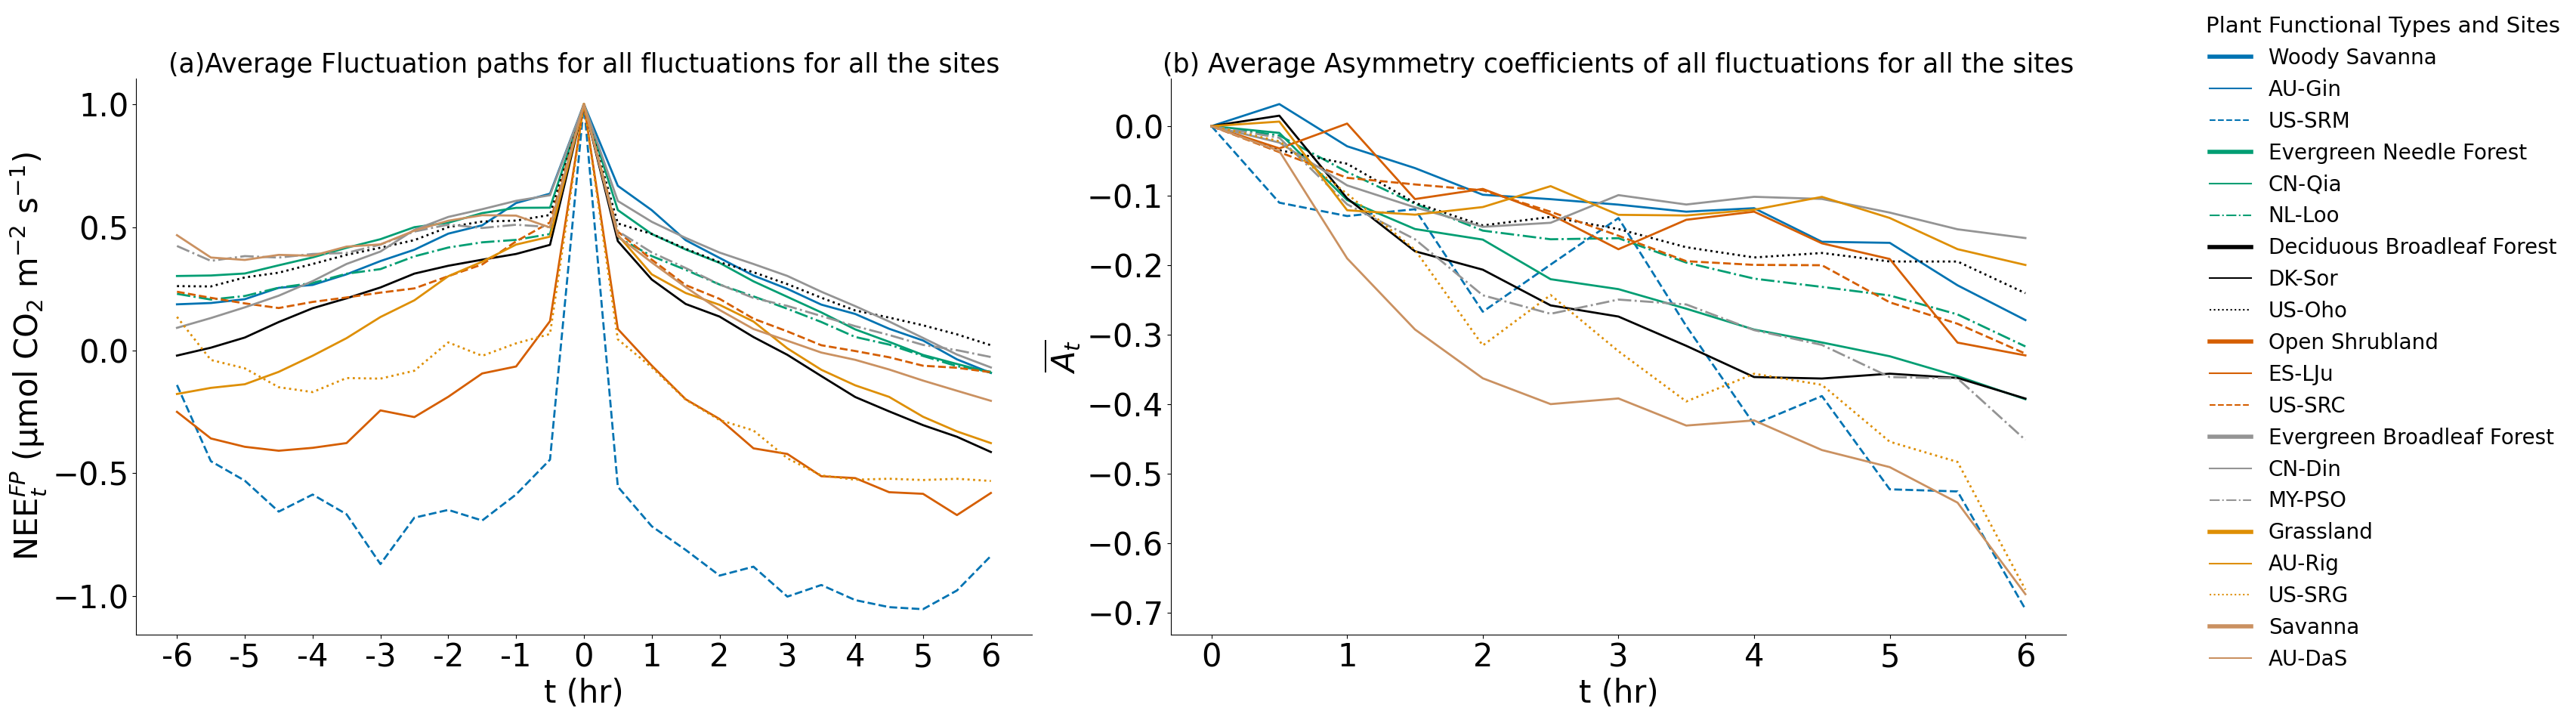

In [23]:
# plotting average fluctuation paths and average asymmetry coefficient for all fluctuations for all sites

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from datetime import timedelta
import matplotlib.lines as mlines
import seaborn as sns

# reading data and defining site labels
data1 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/NEEMEANTHRFPAVG.xlsx")
data2 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/NEEMEANTHRACAVG.xlsx")

ws1 = data1['AUGIN']
enf1 = data1['CNQIA']
dbf1 = data1['DKSOR']
osh1 = data1['ESLJU']
ebf1 = data1['CNDIN']
enf2 = data1['NLLOO']
osh2 = data1['USSRC']
gra1 = data1['AURIG']
gra2 = data1['USSRG']
sav = data1['AUDAS']
dbf2 = data1['USOHO']
ebf2 = data1['MYPSO']
ws2 = data1['USSRM']

# plotting 
# Creating colorblind-friendly palette and defining color for each PFT
palette = sns.color_palette("colorblind", 8)


spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'   
}

pft_colors = {
    'Woody Savanna': spec_colors['USSRM'],  
    'Evergreen Needle Forest': palette[2],  
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'],  
    'Open Shrubland': spec_colors['USSRC'],  
    'Evergreen Broadleaf Forest': palette[7], 
    'Grassland': spec_colors['AURIG'], 
    'Savanna': palette[5]  
}

pft_ls = {
    'Woody Savanna': ['-', '--'],
    'Evergreen Needle Forest': ['-', '-.'],
    'Deciduous Broadleaf Forest': ['-', ':'],
    'Open Shrubland': ['-', '--'],
    'Evergreen Broadleaf Forest': ['-', '-.'],
    'Grassland': ['-', ':'],
    'Savanna': ['-']
}

site_labels = {
    'AUGIN': ('Woody Savanna', 'AU-Gin', ws1),
    'USSRM': ('Woody Savanna', 'US-SRM', ws2),
    'CNQIA': ('Evergreen Needle Forest', 'CN-Qia', enf1),
    'NLLOO': ('Evergreen Needle Forest', 'NL-Loo', enf2),
    'DKSOR': ('Deciduous Broadleaf Forest', 'DK-Sor', dbf1),
    'USOHO': ('Deciduous Broadleaf Forest', 'US-Oho', dbf2),
    'ESLJU': ('Open Shrubland', 'ES-LJu', osh1),
    'USSRC': ('Open Shrubland', 'US-SRC', osh2),
    'CNDIN': ('Evergreen Broadleaf Forest', 'CN-Din', ebf1),
    'MYPSO': ('Evergreen Broadleaf Forest', 'MY-PSO', ebf2),
    'AURIG': ('Grassland', 'AU-Rig', gra1),
    'USSRG': ('Grassland', 'US-SRG', gra2),
    'AUDAS': ('Savanna', 'AU-DaS', sav),
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(29, 10))

data1 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/NEEMEANTHRFPAVG.xlsx")
data2 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/NEEMEANTHR/NEEMEANTHRACAVG.xlsx")


pft_cnt = {pft: 0 for pft in pft_colors.keys()}

x_tick_labels1 = (-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)

x_tick_labels2 = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)

for site_val, (pft, site_name, data) in site_labels.items():
    color = pft_colors[pft]
    linestyle = pft_ls[pft][pft_cnt[pft] % len(pft_ls[pft])]
    pft_cnt[pft] += 1
    
    # Plotting for NEE^FP
    if site_val in data1.columns:
        ax1.plot(x_tick_labels1, data1[site_val], lw=2, color=color, linestyle=linestyle, label=f"{pft} - {site_name}")
    
    # Plotting for A_t
    if site_val in data2.columns:
        ax2.plot(range(len(x_tick_labels2)), data2[site_val], lw=2, color=color, linestyle=linestyle, label=f"{pft} - {site_name}")

ax1.set_xticks(x_tick_labels1)
ax1.set_xticklabels(x_tick_labels1)
xticks1 = ax1.xaxis.get_major_ticks()
hidden_indices1 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
for index in hidden_indices1:
    if index < len(xticks1):
        xticks1[index].label1.set_visible(False)
        xticks1[index].tick1line.set_visible(False)
ax1.set_xlabel("t (hr)", size='30')
ax1.set_ylabel('NEE$^{FP}_{t}$ (μmol CO$_2$ m$^{-2}$ s$^{-1}$)', size=30)
ax1.tick_params(axis='both', labelsize=30)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('(a)Average Fluctuation paths for all fluctuations for all the sites', fontsize=25)

ax2.set_xticks(range(len(x_tick_labels2)))
ax2.set_xticklabels(x_tick_labels2)
xticks2 = ax2.xaxis.get_major_ticks()
hidden_indices2 = [1, 3, 5, 7, 9, 11]
for index in hidden_indices2:
    if index < len(xticks2):
        xticks2[index].label1.set_visible(False)
        xticks2[index].tick1line.set_visible(False)
ax2.set_xlabel("t (hr)", size='30')
ax2.set_ylabel('$\overline{A_{t}}$', size='30')
ax2.tick_params(axis='both', labelsize=30)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('(b) Average Asymmetry coefficients of all fluctuations for all the sites', fontsize=25)

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pft_groups = {}
for site_code, (pft, site_name, data) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_name)
legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            linestyle = pft_ls[pft][pft_groups[pft].index(site) % len(pft_ls[pft])]
            legend_elements.append(plt.Line2D([0], [0], color=color, 
                                              linestyle=linestyle,
                                              label=f"{site}",
                                              markersize=8, markeredgecolor='black'))

# Creating the legend
legend = fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), 
                    fontsize=20, title="Plant Functional Types and Sites", frameon=False)
legend.get_title().set_fontsize(21)

plt.tight_layout(rect=[0, 0, 0.95, 0.90]) 
plt.show()

Figure 3 in the manuscript - plotting average fluctuation paths and average asymmetry coefficient for top 1% fluctuations for all sites

/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/4235648097.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.1, 0.2, 0.2])


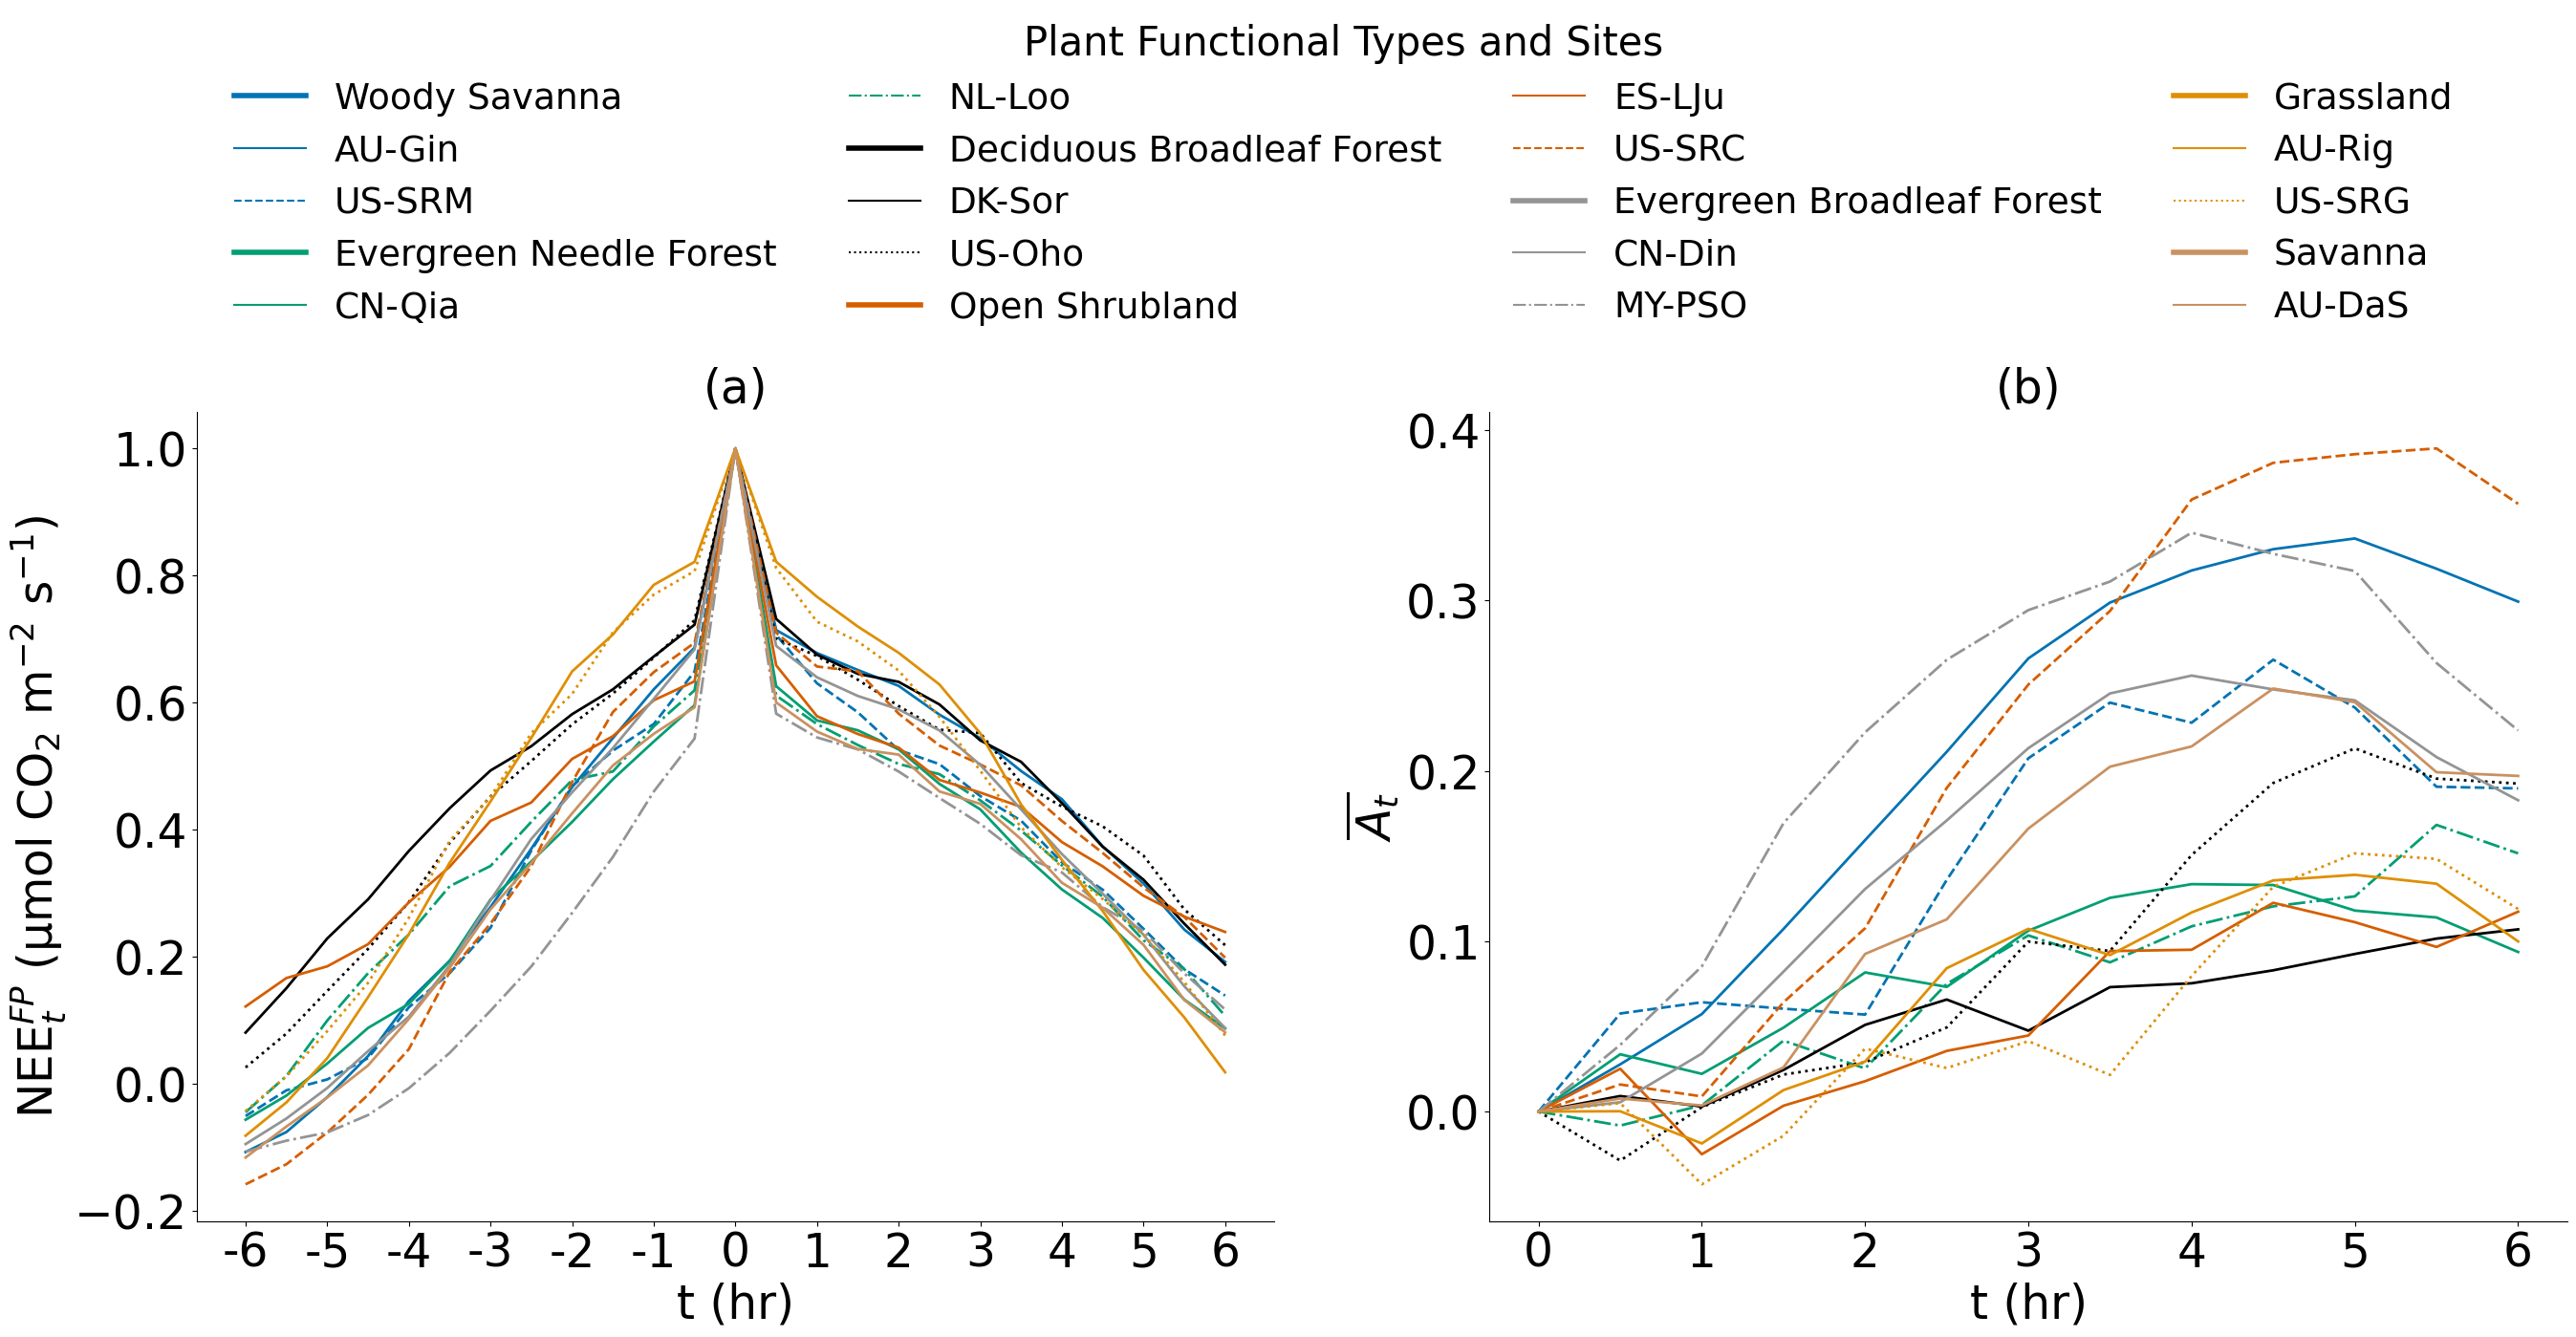

In [24]:

# reading data
data1 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/C99THR/C99THRFPAVG.xlsx")
data2 = pd.read_excel("/Users/nikhi/Desktop/fluxnet sites/C99THR/C99THRACAVG.xlsx")

# Creating the colorblind-friendly palette and defining color and line style for each PFT
palette = sns.color_palette("colorblind", 8)
spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'  
}
pft_colors = {
    'Woody Savanna': spec_colors['USSRM'], 
    'Evergreen Needle Forest': palette[2],  
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'],  
    'Open Shrubland': spec_colors['USSRC'], 
    'Evergreen Broadleaf Forest': palette[7], 
    'Grassland': spec_colors['AURIG'], 
    'Savanna': palette[5] 
}
pft_ls = {
    'Woody Savanna': ['-', '--'],
    'Evergreen Needle Forest': ['-', '-.'],
    'Deciduous Broadleaf Forest': ['-', ':'],
    'Open Shrubland': ['-', '--'],
    'Evergreen Broadleaf Forest': ['-', '-.'],
    'Grassland': ['-', ':'],
    'Savanna': ['-']
}

site_labels = {
    'AUGIN': ('Woody Savanna', 'AU-Gin', ws1),
    'USSRM': ('Woody Savanna', 'US-SRM', ws2),
    'CNQIA': ('Evergreen Needle Forest', 'CN-Qia', enf1),
    'NLLOO': ('Evergreen Needle Forest', 'NL-Loo', enf2),
    'DKSOR': ('Deciduous Broadleaf Forest', 'DK-Sor', dbf1),
    'USOHO': ('Deciduous Broadleaf Forest', 'US-Oho', dbf2),
    'ESLJU': ('Open Shrubland', 'ES-LJu', osh1),
    'USSRC': ('Open Shrubland', 'US-SRC', osh2),
    'CNDIN': ('Evergreen Broadleaf Forest', 'CN-Din', ebf1),
    'MYPSO': ('Evergreen Broadleaf Forest', 'MY-PSO', ebf2),
    'AURIG': ('Grassland', 'AU-Rig', gra1),
    'USSRG': ('Grassland', 'US-SRG', gra2),
    'AUDAS': ('Savanna', 'AU-DaS', sav),
}

# plotting the panel figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 11))
pft_cnt = {pft: 0 for pft in pft_colors.keys()}
x_tick_labels1 = (-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)
x_tick_labels2 = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)

for site_val, (pft, site_name, data) in site_labels.items():
    color = pft_colors[pft]
    linestyle = pft_ls[pft][pft_cnt[pft] % len(pft_ls[pft])]
    pft_cnt[pft] += 1
    
    # Plotting for NEE^FP
    if site_val in data1.columns:
        ax1.plot(x_tick_labels1, data1[site_val], lw=2, color=color, linestyle=linestyle, label=f"{pft} - {site_name}")
    
    # Plotting for A_t
    if site_val in data2.columns:
        ax2.plot(range(len(x_tick_labels2)), data2[site_val], lw=2, color=color, linestyle=linestyle, label=f"{pft} - {site_name}")

ax1.set_xticks(x_tick_labels1)
ax1.set_xticklabels(x_tick_labels1)
xticks1 = ax1.xaxis.get_major_ticks()
hidden_indices1 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
for index in hidden_indices1:
    if index < len(xticks1):
        xticks1[index].label1.set_visible(False)
        xticks1[index].tick1line.set_visible(False)
ax1.set_xlabel("t (hr)", size='35')
ax1.set_ylabel('NEE$^{FP}_{t}$ (μmol CO$_2$ m$^{-2}$ s$^{-1}$)', size=35)
ax1.tick_params(axis='both', labelsize=35)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('(a)', fontsize=35)

ax2.set_xticks(range(len(x_tick_labels2)))
ax2.set_xticklabels(x_tick_labels2)
xticks2 = ax2.xaxis.get_major_ticks()
hidden_indices2 = [1, 3, 5, 7, 9, 11]
for index in hidden_indices2:
    if index < len(xticks2):
        xticks2[index].label1.set_visible(False)
        xticks2[index].tick1line.set_visible(False)
ax2.set_xlabel("t (hr)", size='35')
ax2.set_ylabel('$\overline{A_{t}}$', size='35')
ax2.tick_params(axis='both', labelsize=35)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('(b)', fontsize=35)

# Creating the legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pft_groups = {}
for site_val, (pft, site_name, data) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_name)
legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            linestyle = pft_ls[pft][pft_groups[pft].index(site) % len(pft_ls[pft])]
            legend_elements.append(plt.Line2D([0], [0], color=color, 
                                              linestyle=linestyle,
                                              label=f"{site}",
                                              markersize=8, markeredgecolor='black'))

legend = fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.28), 
                    fontsize=27, title="Plant Functional Types and Sites", ncol=4, frameon=False)

legend.get_title().set_fontsize(30)

# plt.savefig('/Users/nikhi/Desktop/PAPER_FIGURES/_MANU_PANEL.png', dpi=600, bbox_inches='tight')

plt.tight_layout(rect=[0, 0.1, 0.2, 0.2])
plt.show()


Figure S6 in the Supplementary information -Asymmetry variation between threshold=mean (c=0) and threshold for top 1% fluctuations for all sites for 3 years 

In [25]:
# Providing coefficients to get ac and ac_avg variation with changing threshold
coeff = [0, 2.23]
ac_values = []  
ac_avg_values = []

for c in coeff:
    thresholds = basic_stats(x, c)
    templistup, timeup, templistupindices, listupindices, listup1indices, filtered_peaks = get_filtered_peaks_and_other(x, thresholds)
    allpointsaboveUL = pick_points(x, thresholds)
    neegp = tau_points(filtered_peaks)
    columns = ['Timestamp', 'TA', 'SW', 'GPP_DT_VUT_REF', 'RECO_DT_VUT_REF', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF', 'SWC_F_MDS_1']
    output_name = 'NEE'
    df_allNEE = fluctuation_paths(neegp, columns, df, output_name)
    divided_df_all, divided_df_all_avg = divide_cells(df_allNEE)
    ac, ac_avg = get_ac_coeffs(divided_df_all, neegp)
    ac_values.append(ac)
    ac_avg_values.append(ac_avg)


/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  date = gp["Timestamp"] + pd.Timedelta(6, unit=freq)
/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  dateminus = gp["Timestamp"] + pd.Timedelta(-6, unit=freq)
/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  date = gp["Timestamp"] + pd.Timedelta(6, unit=freq)
/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_55473/2745296396.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  dateminus = gp["Timestamp"] + pd.Timedelta(-6, unit=freq)


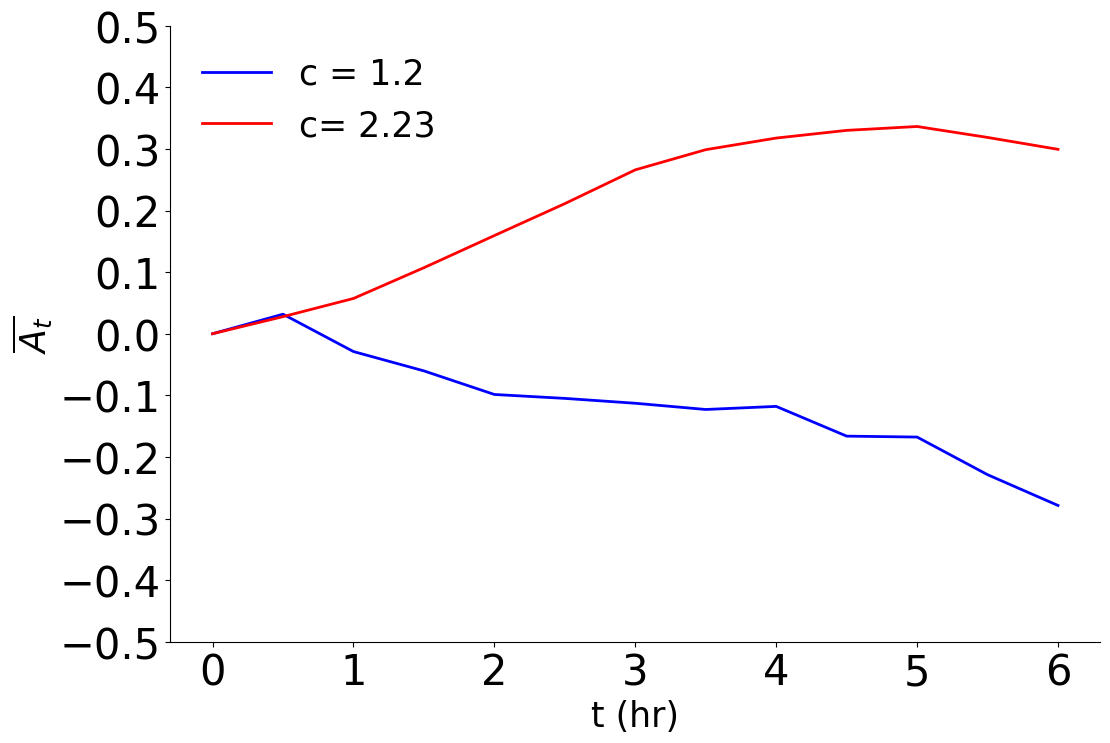

In [26]:
# plotting asymmetry variation with threshold
colors = ['b', 'r']
legend_labels = [ 'c = 1.2',  'c= 2.23']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

for i in range(0, len(coeff)):
    ax.plot(ac_avg_values[i], lw=2, color=colors[i])

ax.set_xlabel("t (hr)", size='25')
ax.set_ylabel('$\overline{A_{t}}$', size='25')
ax.tick_params(axis='both', labelsize=20) 
ax.set_ylim(-0.5, 0.5) 
ax.set_yticks(np.arange(-0.5, 0.51, step=0.1))
x_tick_labels = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)
ax.set_xticks(range(len(x_tick_labels)))
ax.set_xticklabels(x_tick_labels)
ax.tick_params(axis='both', labelsize=30)
xticks = ax.xaxis.get_major_ticks()
hidden_indices = [1, 3, 5, 7, 9, 11]

for index in hidden_indices:
    if index < len(xticks):
        xticks[index].label1.set_visible(False)
        xticks[index].tick1line.set_visible(False)

ax.legend(legend_labels, loc='best', prop={'size': 25},frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Figure 4 in the manuscript - plotting the relationship between Amax at the top 1% (c = 99%) versus the 3-year temperature average for each site

In [27]:

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import seaborn as sns

# Defining sigmoid function
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Loading data
file_names = [
    "AUGINTEMP.xlsx", "CNQIATEMP.xlsx", "CNDINTEMP.xlsx", "DKSORTEMP.xlsx", 
    "ESLJUTEMP.xlsx", "NLLOOTEMP.xlsx", "AUDASTEMP.xlsx", "USOHOTEMP.xlsx", 
    "MYPSOTEMP.xlsx", "USSRMTEMP.xlsx", "USSRCTEMP.xlsx", "AURIGTEMP.xlsx", 
    "USSRGTEMP.xlsx"
]

# defining markers
markers = ['o', 's', '^', 'D', '*', 'X', '<', '>', '3', '8', 'p', 'h', '+']

# Creating the colorblind-friendly palette and defining color and line style for each PFT
palette = sns.color_palette("colorblind", 8)
spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'  
}
pft_colors = {
    'Woody Savanna': spec_colors['USSRM'], 
    'Evergreen Needle Forest': palette[2], 
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'], 
    'Open Shrubland': spec_colors['USSRC'],
    'Evergreen Broadleaf Forest': palette[7],  
    'Grassland': spec_colors['AURIG'],
    'Savanna': palette[5]
}

site_labels = {
    'AUGIN': ('Woody Savanna', 'AU-Gin'),
    'USSRM': ('Woody Savanna', 'US-SRM'),
    'CNQIA': ('Evergreen Needle Forest', 'CN-Qia'),
    'NLLOO': ('Evergreen Needle Forest', 'NL-Loo'),
    'DKSOR': ('Deciduous Broadleaf Forest', 'DK-Sor'),
    'USOHO': ('Deciduous Broadleaf Forest', 'US-Oho'),
    'ESLJU': ('Open Shrubland', 'ES-LJu'),
    'USSRC': ('Open Shrubland', 'US-SRC'),
    'CNDIN': ('Evergreen Broadleaf Forest', 'CN-Din'),
    'MYPSO': ('Evergreen Broadleaf Forest', 'MY-PSO'),
    'AURIG': ('Grassland', 'AU-Rig'),
    'USSRG': ('Grassland', 'US-SRG'),
    'AUDAS': ('Savanna', 'AU-DaS'),
}

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import seaborn as sns

# Defining sigmoid function
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Loading data
file_names = [
    "AUGINTEMP.xlsx", "CNQIATEMP.xlsx", "CNDINTEMP.xlsx", "DKSORTEMP.xlsx", 
    "ESLJUTEMP.xlsx", "NLLOOTEMP.xlsx", "AUDASTEMP.xlsx", "USOHOTEMP.xlsx", 
    "MYPSOTEMP.xlsx", "USSRMTEMP.xlsx", "USSRCTEMP.xlsx", "AURIGTEMP.xlsx", 
    "USSRGTEMP.xlsx"
]

# defining markers
markers = ['o', 's', '^', 'D', '*', 'X', '<', '>', '3', '8', 'p', 'h', '+']

# Creating the colorblind-friendly palette and defining color and line style for each PFT
palette = sns.color_palette("colorblind", 8)
spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'  
}
pft_colors = {
    'Woody Savanna': spec_colors['USSRM'], 
    'Evergreen Needle Forest': palette[2], 
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'], 
    'Open Shrubland': spec_colors['USSRC'],
    'Evergreen Broadleaf Forest': palette[7],  
    'Grassland': spec_colors['AURIG'],
    'Savanna': palette[5]
}

site_labels = {
    'AUGIN': ('Woody Savanna', 'AU-Gin'),
    'USSRM': ('Woody Savanna', 'US-SRM'),
    'CNQIA': ('Evergreen Needle Forest', 'CN-Qia'),
    'NLLOO': ('Evergreen Needle Forest', 'NL-Loo'),
    'DKSOR': ('Deciduous Broadleaf Forest', 'DK-Sor'),
    'USOHO': ('Deciduous Broadleaf Forest', 'US-Oho'),
    'ESLJU': ('Open Shrubland', 'ES-LJu'),
    'USSRC': ('Open Shrubland', 'US-SRC'),
    'CNDIN': ('Evergreen Broadleaf Forest', 'CN-Din'),
    'MYPSO': ('Evergreen Broadleaf Forest', 'MY-PSO'),
    'AURIG': ('Grassland', 'AU-Rig'),
    'USSRG': ('Grassland', 'US-SRG'),
    'AUDAS': ('Savanna', 'AU-DaS'),
}


In [28]:
# creating ditionary to store temperature data
temp_data = {}

for file, marker in zip(file_names, markers):
    site_val = file[:5]
    
    if site_val in site_labels:
        pft, label = site_labels[site_val]
        color = pft_colors[pft]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/3YRTEMP/{file}")
        temp_3yr = df.iloc[0, 1]   
        peakstemp = df.iloc[:, 0]
        meanactemp = np.mean(peakstemp)
        stdactemp = np.std(peakstemp)
        temp_data[label] = {"temp_3yr": temp_3yr, "meanactemp": meanactemp, "stdactemp": stdactemp, "marker": marker, "color": color}


In [29]:
# calculating statistics and getting modeled and observed values from the fitted sigmoidal function
x_data = []
y_data = []
for site, data in temp_data.items():
    x_data.append(data["temp_3yr"])
    y_data.append(data["meanactemp"])

x_data = np.array(x_data)
y_data = np.array(y_data)

# Estimating L
L_est = np.max(y_data) - np.min(y_data)

# Fittng the sigmoid function 
popt, _ = curve_fit(sigmoid, x_data, y_data, 
                    p0=[L_est, 1, np.mean(x_data)],
                    bounds=([0, -np.inf, -np.inf], [np.inf, np.inf, np.inf]))

# Getting points for the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = sigmoid(x_fit, *popt)

# Calculating statistics
y_pred = sigmoid(x_data, *popt)
rmse = np.sqrt(mean_squared_error(y_data, y_pred))
r_squared = r2_score(y_data, y_pred)

# Storing modeled and observed values
modeled_values = []
for site, data in temp_data.items():
    mean_ac_max = sigmoid(data["temp_3yr"], *popt)
    modeled_values.append(mean_ac_max)
observed_values = []
for site, data in temp_data.items():
    observed_values.append(data["meanactemp"])

In [30]:
# printing the observed and modeled values
for site, obs, mod in zip(temp_data.keys(), observed_values, modeled_values):
    print(f"{site}: Observed = {obs:.4f}, Modeled = {mod:.4f}")

AU-Gin: Observed = 0.4120, Modeled = 0.3118
CN-Qia: Observed = 0.2392, Modeled = 0.2988
CN-Din: Observed = 0.3082, Modeled = 0.3353
DK-Sor: Observed = 0.1478, Modeled = 0.0895
ES-LJu: Observed = 0.1244, Modeled = 0.1540
NL-Loo: Observed = 0.1278, Modeled = 0.1260
AU-DaS: Observed = 0.2732, Modeled = 0.3925
US-Oho: Observed = 0.1691, Modeled = 0.1442
MY-PSO: Observed = 0.4716, Modeled = 0.3844
US-SRM: Observed = 0.2863, Modeled = 0.3108
US-SRC: Observed = 0.4534, Modeled = 0.3228
AU-Rig: Observed = 0.1274, Modeled = 0.2399
US-SRG: Observed = 0.3025, Modeled = 0.3124


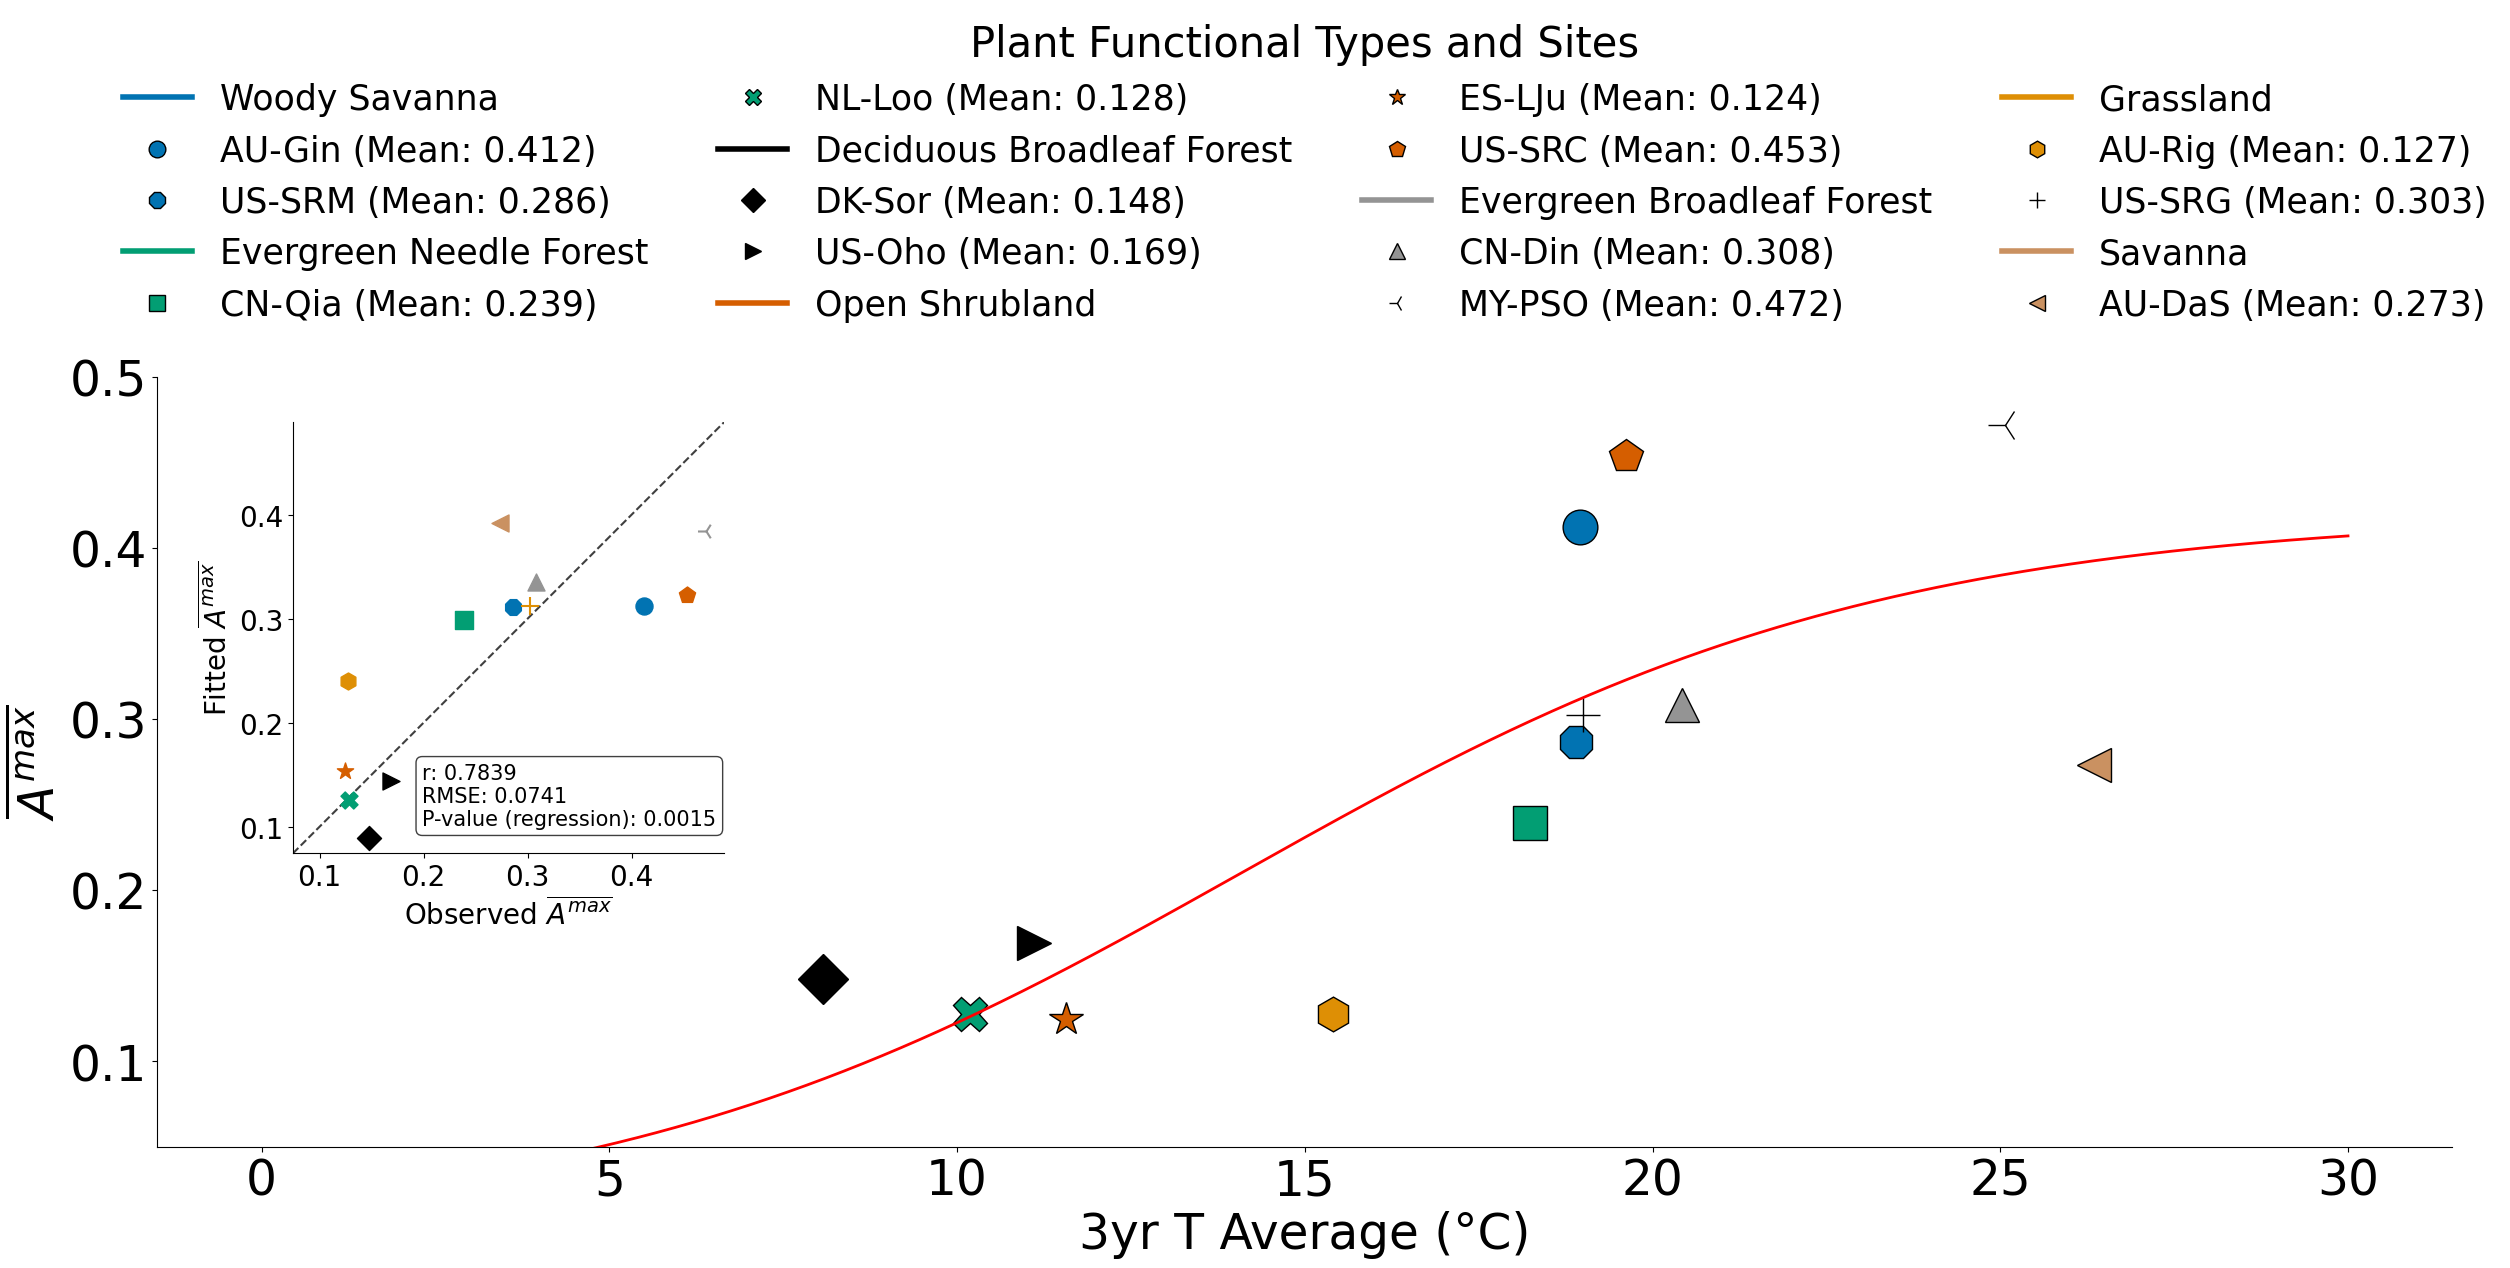

In [34]:
#  plotting

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(27, 14))  
ax_main = fig.add_axes([0.1, 0.1, 0.85, 0.55])

for site, data in temp_data.items():
    ax_main.plot(data["temp_3yr"], data["meanactemp"],
                 marker=data["marker"], color=data["color"], 
                 markeredgecolor='black', markerfacecolor=data["color"],
                 label=site, markersize=25)

# fitting sigmoid curve
x_fit = np.linspace(0, 30, 1000)
y_fit = sigmoid(x_fit, *popt)
ax_main.plot(x_fit, y_fit, 'r-', linewidth=2, label='Sigmoid Fit')
ax_main.set_xlabel('3yr T Average (°C)', fontsize=35)
ax_main.set_ylabel('$\overline{A^{max}}$', fontsize=35)
ax_main.tick_params(axis='both', which='major', labelsize=35)
ax_main.spines['right'].set_visible(False)
ax_main.spines['top'].set_visible(False)
ax_main.set_ylim(0.05, 0.5)

pft_groups = {}
for site_val, (pft, site_label) in site_labels.items():
    if pft not in pft_groups:
        pft_groups[pft] = []
    pft_groups[pft].append(site_label)

# Creating the legend
legend_elements = []
for pft, color in pft_colors.items():
    if pft in pft_groups:
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=4, label=pft))
        for site in pft_groups[pft]:
            data = temp_data[site]
            legend_elements.append(plt.Line2D([0], [0], marker=data['marker'], color='w', 
                                           label=f"{site} (Mean: {data['meanactemp']:.3f})",
                                           markerfacecolor=color, markersize=12, 
                                           markeredgecolor='black'))

legend = ax_main.legend(handles=legend_elements, 
                       loc='upper center', 
                       bbox_to_anchor=(0.5, 1.5),  
                       fontsize=25,
                       title="Plant Functional Types and Sites", 
                       ncol=4, 
                       frameon=False)
legend.get_title().set_fontsize(30)

# creating the inset plot
ax_inset = inset_axes(ax_main, 
                      width="40%", height="40%", 
                      loc='upper left',
                      bbox_to_anchor=(0.05, -0.45, 0.5, 1.4), 
                      bbox_transform=ax_main.transAxes)

for site, data in temp_data.items():
    ax_inset.scatter(data["meanactemp"], sigmoid(data["temp_3yr"], *popt), 
                    label=site, marker=data["marker"], color=data["color"], s=150)

# ploting the linear fit for the inset plot 
obs_array = np.array(observed_values)
mod_array = np.array(modeled_values)
slope, _, _, p_value_linreg = stats.linregress(obs_array, mod_array)[:4]

# Calculating Pearson correlation
corr, _ = stats.pearsonr(observed_values, modeled_values)

# Calculating RMSE
rmse = np.sqrt(np.mean((obs_array - mod_array)**2))


# Plotting the fitted line
fit_line = slope * obs_array
# ax_inset.plot(obs_array, fit_line, 'r--')

textstr = (
    f'r: {corr:.4f}\n'
    f'RMSE: {rmse:.4f}\n'
    f'P-value (regression): {p_value_linreg:.4f}'
)
props = dict(boxstyle='round', facecolor='white', alpha=0.75)
ax_inset.text(0.30, 0.21, textstr, transform=ax_inset.transAxes, fontsize=15,
              verticalalignment='top', bbox=props)
ax_inset.set_xlabel('Observed $\overline{A^{max}}$', fontsize=20)
ax_inset.set_ylabel('Fitted $\overline{A^{max}}$', fontsize=20)
ax_inset.tick_params(axis='both', which='major', labelsize=20)
ax_inset.spines['right'].set_visible(False)
ax_inset.spines['top'].set_visible(False)

# Adding 1:1 line
lims = [
    np.min([ax_inset.get_xlim(), ax_inset.get_ylim()]),  
    np.max([ax_inset.get_xlim(), ax_inset.get_ylim()]), 
]
ax_inset.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax_inset.set_aspect('equal')
ax_inset.set_xlim(lims)
ax_inset.set_ylim(lims)

# plt.savefig('/Users/nikhi/Desktop/PAPER_FIGURES/_B_4.png', dpi=600, bbox_inches='tight')

plt.subplots_adjust(top=0.8, bottom=0.15, left=0.1, right=0.95)
plt.show()

Figure 5 in the manuscript - Comparison of peak values Amax for all fluctuations at c=0 (left) and top 1% of fluctuations for c at 99% quantile (right) for each site

In [35]:

# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

# Creating the colorblind-friendly palette and defining color for each Plant Functional Type (PFT)
palette = sns.color_palette("colorblind", 8)
spec_colors = {
    'USSRM': palette[0],  
    'AURIG': palette[1],  
    'USSRC': palette[3],  
    'DKSOR': '#000000'   
}
pft_colors = {
    'Woody Savanna': spec_colors['USSRM'],  
    'Evergreen Needle Forest': palette[2],
    'Deciduous Broadleaf Forest': spec_colors['DKSOR'],  
    'Open Shrubland': spec_colors['USSRC'], 
    'Evergreen Broadleaf Forest': palette[7], 
    'Grassland': spec_colors['AURIG'], 
    'Savanna': palette[5] 
}

# importing necessary files
file_names_all = [
    "AUGINPEAKS.xlsx", "CNQIAPEAKS.xlsx", "CNDINPEAKS.xlsx", "DKSORPEAKS.xlsx", 
    "ESLJUPEAKS.xlsx", "NLLOOPEAKS.xlsx", "AUDASPEAKS.xlsx", "USOHOPEAKS.xlsx", 
    "MYPSOPEAKS.xlsx", "USSRMPEAKS.xlsx", "USSRCPEAKS.xlsx", "AURIGPEAKS.xlsx", 
    "USSRGPEAKS.xlsx"
]

file_names_99 = [
    "AUGIN99PEAKS.xlsx", "CNQIA99PEAKS.xlsx", "CNDIN99PEAKS.xlsx", "DKSOR99PEAKS.xlsx", 
    "ESLJU99PEAKS.xlsx", "NLLOO99PEAKS.xlsx", "AUDAS99PEAKS.xlsx", "USOHO99PEAKS.xlsx", 
    "MYPSO99PEAKS.xlsx", "USSRM99PEAKS.xlsx", "USSRC99PEAKS.xlsx", "AURIG99PEAKS.xlsx", 
    "USSRG99PEAKS.xlsx"
]

# creating site specfifcations and site labels
site_specs = {
    'Woody Savanna (AU-Gin)': (pft_colors['Woody Savanna'], ''),
    'Woody Savanna (US-SRM)': (pft_colors['Woody Savanna'], '//'),
    'Evergreen Needle Forest (CN-Qia)': (pft_colors['Evergreen Needle Forest'], ''),
    'Evergreen Needle Forest (NL-Loo)': (pft_colors['Evergreen Needle Forest'], '//'),
    'Deciduous Broadleaf Forest (DK-Sor)': (pft_colors['Deciduous Broadleaf Forest'], ''),
    'Deciduous Broadleaf Forest (US-Oho)': (pft_colors['Deciduous Broadleaf Forest'], '//'),
    'Open Shrubland (ES-LJu)': (pft_colors['Open Shrubland'], ''),
    'Open Shrubland (US-SRC)': (pft_colors['Open Shrubland'], '//'),
    'Savanna (AU-DaS)': (pft_colors['Savanna'], ''),
    'Evergreen Broadleaf Forest (CN-Din)': (pft_colors['Evergreen Broadleaf Forest'], ''),
    'Evergreen Broadleaf Forest (MY-PSO)': (pft_colors['Evergreen Broadleaf Forest'], '//'),
    'Grassland (AU-Rig)': (pft_colors['Grassland'], ''),
    'Grassland (US-SRG)': (pft_colors['Grassland'], '//')
}

site_labels = {
    'AUGIN': 'Woody Savanna (AU-Gin)', 'USSRM': 'Woody Savanna (US-SRM)',
    'CNQIA': 'Evergreen Needle Forest (CN-Qia)', 'NLLOO': 'Evergreen Needle Forest (NL-Loo)',
    'DKSOR': 'Deciduous Broadleaf Forest (DK-Sor)', 'USOHO': 'Deciduous Broadleaf Forest (US-Oho)',
    'ESLJU': 'Open Shrubland (ES-LJu)', 'USSRC': 'Open Shrubland (US-SRC)',
    'CNDIN': 'Evergreen Broadleaf Forest (CN-Din)', 'MYPSO': 'Evergreen Broadleaf Forest (MY-PSO)',
    'AURIG': 'Grassland (AU-Rig)', 'USSRG': 'Grassland (US-SRG)',
    'AUDAS': 'Savanna (AU-DaS)'
}



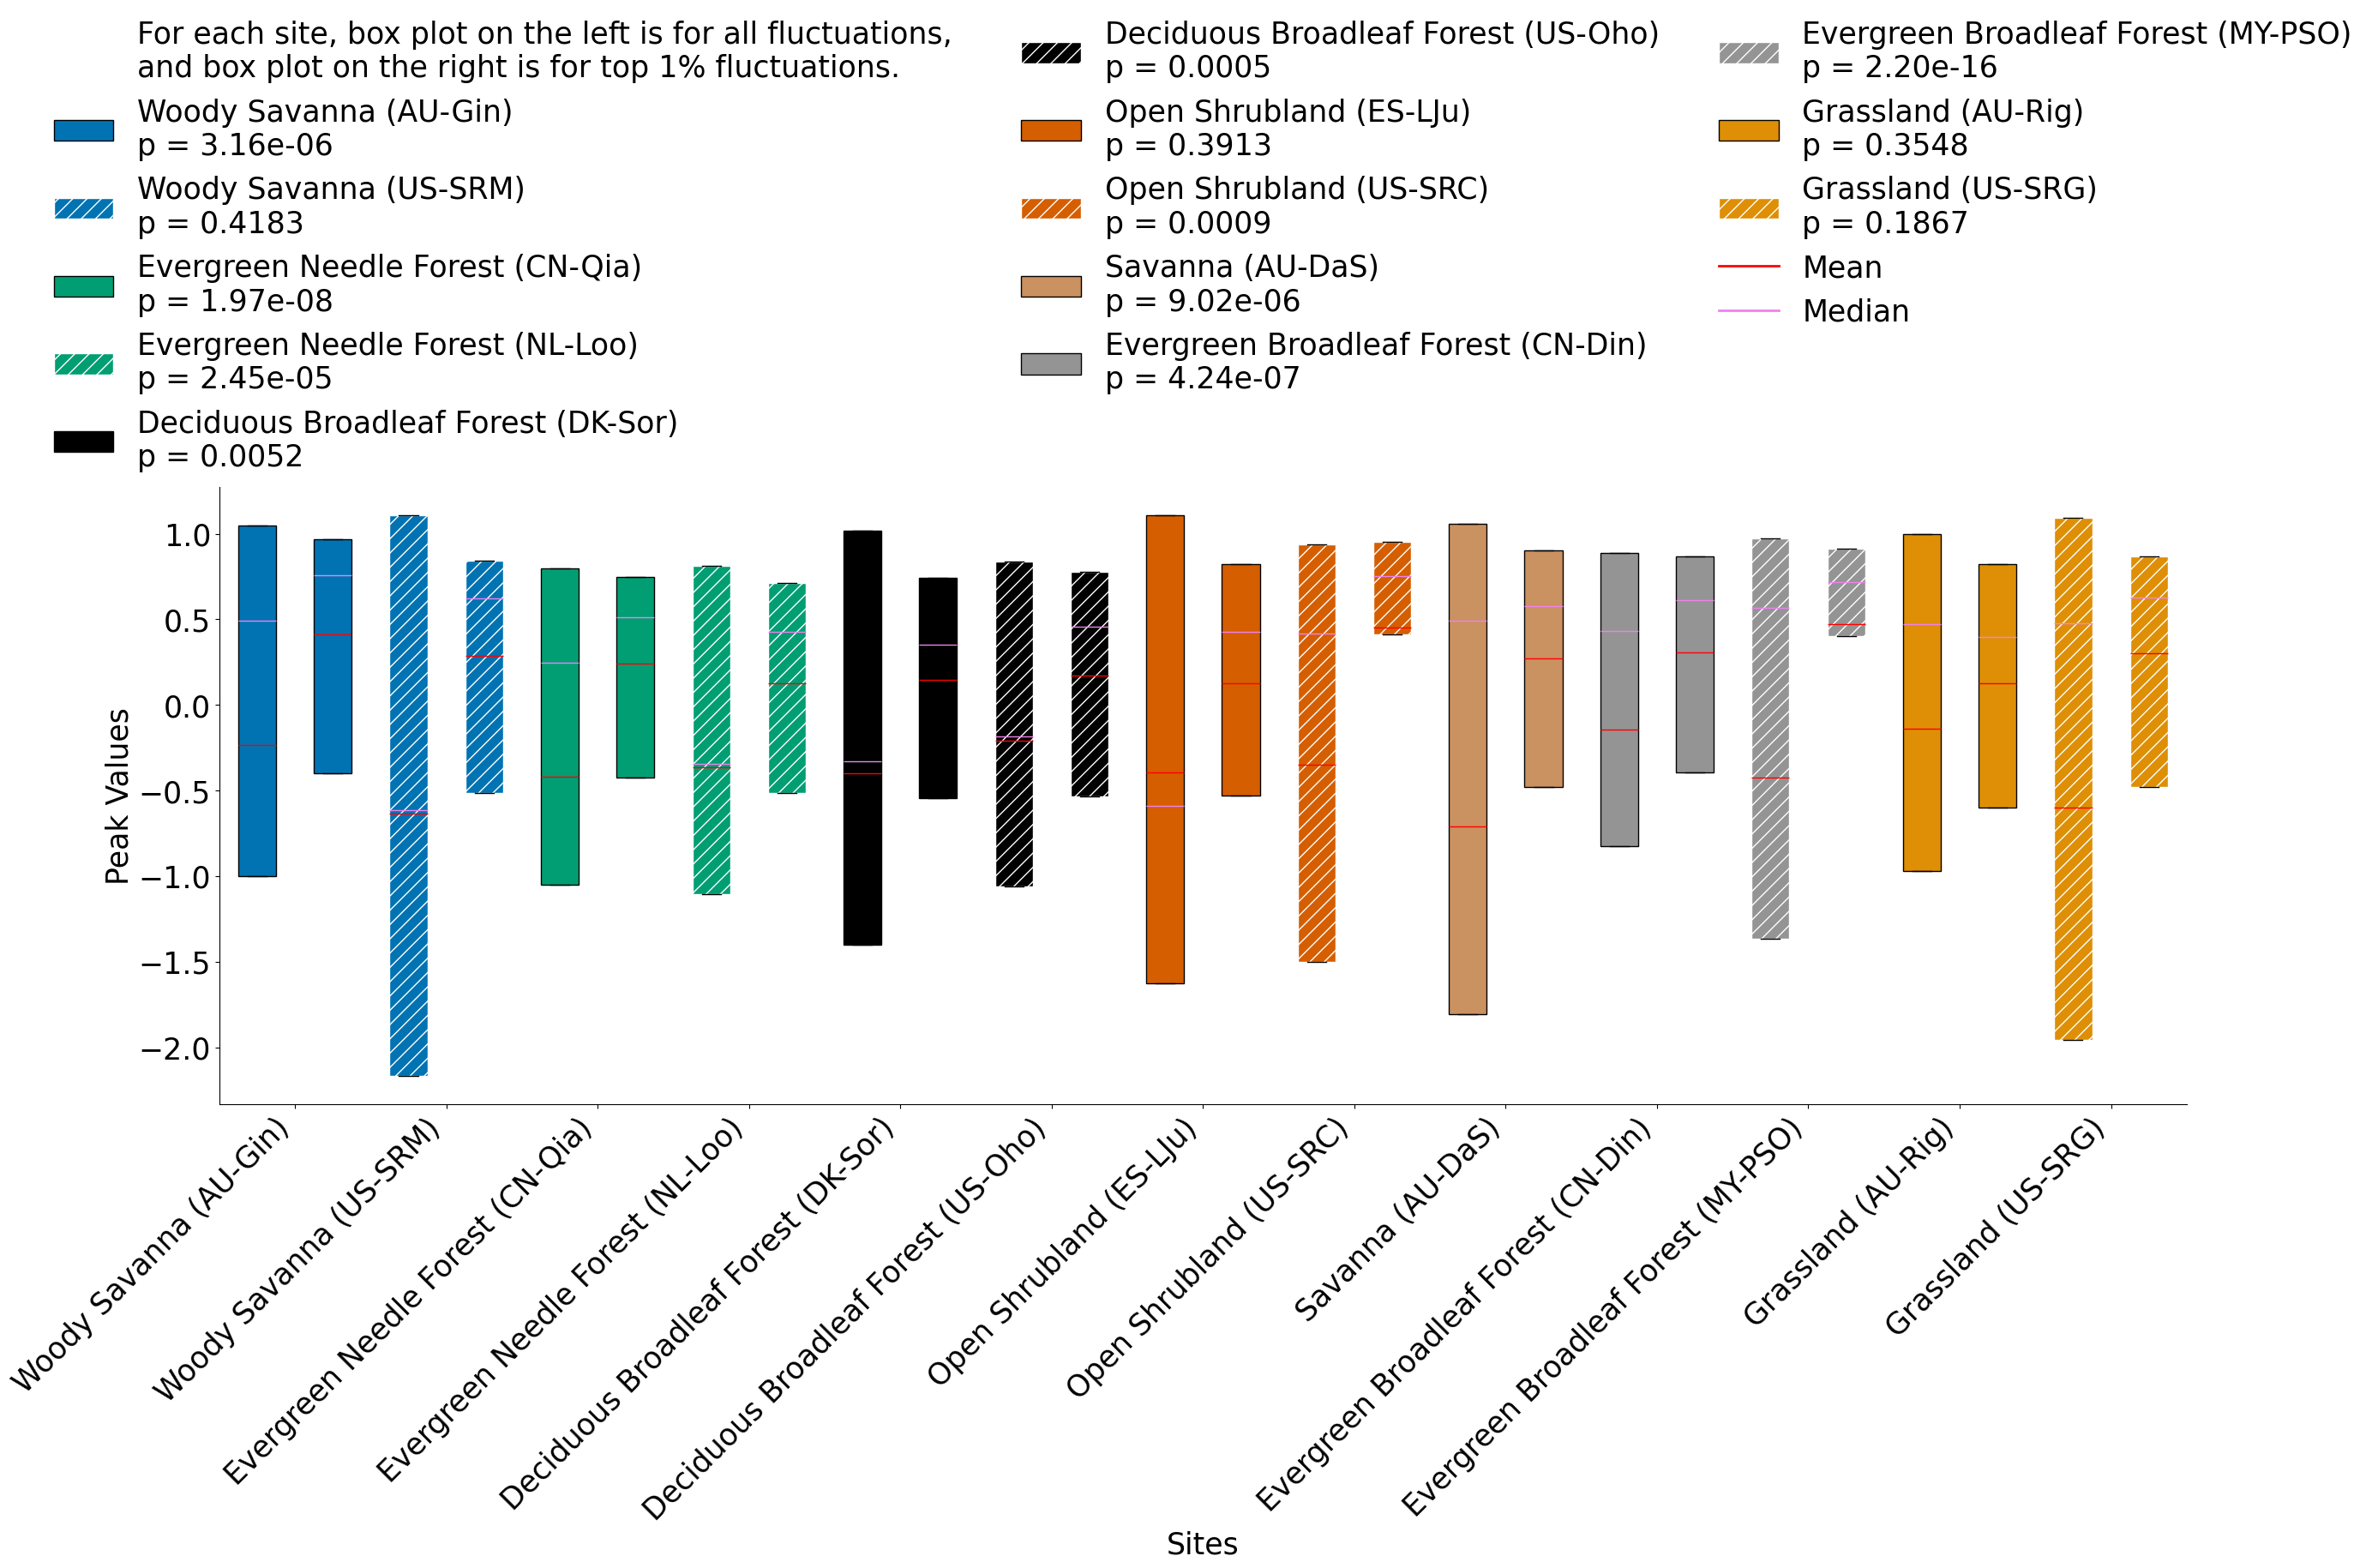

In [ ]:

# Reading data for all anf top 1% fluctuations
site_data_all = {}
for file in file_names_all:
    site_val = file[:5]
    if site_val in site_labels:
        label = site_labels[site_val]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/{file}")
        site_data_all[label] = df.iloc[:, 0].dropna()
site_data_99 = {}
for file in file_names_99:
    site_val = file[:6]
    if site_val[:5] in site_labels:
        label = site_labels[site_val[:5]]
        df = pd.read_excel(f"/Users/nikhi/Desktop/fluxnet sites/ERRORBAR/{file}")
        site_data_99[label] = df.iloc[:, 0].dropna()

#  plotting
fig = plt.figure(figsize=(27, 12))
ax = fig.add_axes([0.1, 0.15, 0.85, 0.6])  
comb_data = []
labels = []

for site in site_specs.keys():
    comb_data.append(site_data_all[site])
    comb_data.append(site_data_99[site])
    labels.append(site)

boxplots = ax.boxplot(comb_data, 
                      patch_artist=True, 
                      labels=[label for label in labels for _ in (0, 1)],
                      showfliers=False,
                      whis=[25, 75],
                      medianprops={"color": "violet"})
for i, (patch, (site, (color, hatch))) in enumerate(zip(boxplots['boxes'][::2], site_specs.items())):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    if hatch:
        patch.set_hatch(hatch)
        patch.set_edgecolor('white')  
    patch = boxplots['boxes'][2*i+1]
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    if hatch:
        patch.set_hatch(hatch)
        patch.set_edgecolor('white')  
    
    mean_all = np.mean(site_data_all[site])
    ax.hlines(mean_all, xmin=2*i+1-0.25, xmax=2*i+1+0.25, color='red', linewidth=1)
    mean_99 = np.mean(site_data_99[site])
    ax.hlines(mean_99, xmin=2*i+2-0.25, xmax=2*i+2+0.25, color='red', linewidth=1)

ax.set_xticks([i+1.5 for i in range(0, len(labels)*2, 2)])
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Sites', fontsize=25)
ax.set_ylabel('Peak Values', fontsize=25)

# creating legend
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], color='white', 
                       label='For each site, box plot on the left is for all fluctuations, \nand box plot on the right is for top 1% fluctuations.'))
for site, (color, hatch) in site_specs.items():
    t_stat, p_value = ttest_ind(site_data_all[site], site_data_99[site])
    formatted_p_val = f'{p_value:.4f}' if p_value >= 1e-4 else f'{p_value:.2e}'
    rect = plt.Rectangle((0, 0), 1, 1, facecolor=color, edgecolor='black')
    if hatch:
        rect.set_hatch(hatch)
        rect.set_edgecolor('white') 
    legend_elements.append((rect, f'{site}\np = {formatted_p_val}'))

legend_elements.append((plt.Line2D([0], [0], color='red', linewidth=2), 'Mean'))
legend_elements.append((plt.Line2D([0], [0], color='violet', linewidth=2), 'Median'))

handles = []
labels = []
for elem in legend_elements:
    if isinstance(elem, tuple):
        handles.append(elem[0])
        labels.append(elem[1])
    else:
        handles.append(elem)
        labels.append(elem.get_label())

legend = ax.legend(handles=handles, labels=labels,
                  loc='upper center', 
                  fontsize=25, 
                  ncol=3,
                  frameon=False, 
                  bbox_to_anchor=(0.5, 1.8))
# plt.savefig('/Users/nikhi/Desktop/PAPER_FIGURES/_A_4.png', dpi=600, bbox_inches='tight')
plt.show()

